# Customer Churn Analysis

# 1.Introduction

### Customer churn means shifting from one service provider to its competitor in the market.  The telecom service providers strive very hard to sustain in this competition. So to sustain this competition they often try to retain their customers than acquiring new ones as it proved to be much costlier.
### Customer churn means shifting from one service provider to its competitor in the market. Customer churn is one of the biggest fears of any industry, particularly for the telecom industry. With an increase in the number of telecom service providers in South Asia, the level of competition is quite high. Although there are many reasons for customer churn, some of the major reasons are service dissatisfaction, costly subscription, and better alternatives. The telecom service providers strive very hard to sustain in this competition. So to sustain this competition they often try to retain their customers than acquiring new ones as it proved to be much costlier. Hence predicting churn in the telecom industry is very important. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In [1]:
from IPython.display import Image
Image(url= "https://46gyn61z4i0t1u1pnq2bbk2e-wpengine.netdna-ssl.com/wp-content/uploads/2017/07/customer-churn-edit.jpeg")

# 2. Problem Statement

#### To predict the telecom customers who are likely to exit the contract and also to generate patterns of Churn and non-churn to assist the management to take appropriate decisions to limit churn.
#### Most telecom companies suffer from voluntary churn. Churn rate has strong impact on the life time value of the customer because it affects the length of service and the future revenue of the company. It is estimated that 75 percent of the 17 to 20 million subscribers signing up with a new wireless carrier every year are coming from another wireless provider, which means they are churners.
#### Attribute Information: The dataset depicts the details of the telecom customer, like, services that each customer has signed for, customer account information , and their demographic info etc.¶

# 3.What Methods I wiil going to solve ?

### Churn Prediction Methodology:
##### Loading The Dataset
##### Feature Selection Method Using Info Gain Of Features.
##### Train Model on Training Dataset
##### Test the model on Testing Dataset
##### Result Analysis
### MACHINE LEARNING METHODS:
##### Six machine learning classification models have been used for prediction of Attrition Prediction:
##### Decision Trees
##### KNN - Kneighbors Classifier
##### AdaBoostClassifier
##### RandomForestClassifier
##### LogisticRegression
##### XGBClassifier.

# 4.The Dataset

### It consists of 7043 observations and 21 variables. Independent variables contain information about customers. Dependent variable refers to customer abandonment status.

### The aim is to automate the process of predicting if a customer would churn or not and to find the factors affecting the churn. The collected data for the variables in the data frames is given below:
#### 1.CustomerID: The unique ID of each customer.

#### 2.Gender: The gender of a person.

#### 3.SeniorCitizen: Whether a customer can be classified as a senior citizen.

#### 4.Partner: If a customer is married/ in a live-in relationship.

#### 5.Dependents: If a customer has dependents (children/ retired parents).

#### 6.Tenure: The time for which a customer has been using the service.

#### 7.PhoneService: Whether a customer has a landline phone service along with the internet service.

#### 8.MultipleLines: Whether a customer has multiple lines of internet connectivity.

#### 9.InternetService: The type of internet services chosen by the customer.

#### 10.OnlineSecurity: Specifies if a customer has online security.

#### 11.OnlineBackup: Specifies if a customer has online backup.

#### 12.DeviceProtection: Specifies if a customer has opted for device protection.

#### 13.TechSupport: Whether a customer has opted for tech support of not.

#### 14.StreamingTV: Whether a customer has an option of TV streaming.

#### 15.StreamingMovies: Whether a customer has an option of Movie streaming.

#### 16.Contract: The type of contract a customer has chosen.

#### 17.PaperlessBilling: Whether a customer has opted for paperless billing.

#### 18.PaymentMethod: Specifies the method by which bills are paid.

#### 19.MonthlyCharges: Specifies the money paid by a customer each month.

#### 20.TotalCharges: The total money paid by the customer to the company.

#### 21.Churn: This is the target variable which specifies if a customer has churned or not.

#### Below I am importing all the important Libraries in one go so that I can use these libraries to make good Model Prediction.

# 5.Importing All Necessary libraries

In [4]:
!pip install xgboost

In [5]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from scipy.stats import zscore

# preprocession, normalizing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn import metrics

# for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# models

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# preprocessing and normalizing
from sklearn.preprocessing import LabelEncoder

# metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

UsageError: Line magic function `%` not found.


#### By Importing above All Necessary Libraries I got the idea of implementing all the Libraries in one go for better model Prediction in this dataset.

# 6.Reading the Csv file

In [6]:
df = pd.read_csv('Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Here I am loading the data set into a variable i.e. “df” and processing the first 5 rows.
#### After Reading the csv file I find out that Churn are label columns while remaning are the Features columns.

# 7.EDA - Exploratory Data Analysis

### In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.
### EDA which focuses more narrowly on checking assumptions required for model fitting and hypothesis testing, and handling missing values and making transformations of variables as needed.

In [7]:
df.shape

(7043, 21)

#### By using shape I got 7043 rows and 21 columns.

In [8]:
# lets find out is there any null value in any columns

pd.set_option('display.max_rows',None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Also, most of the column are object and few columns are int64 data type.

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.shape

(7043, 21)

#### From the above code I can analayze there are no duplicates in this dataset.

In [11]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

#### By finding (df.unique()) it distinguish the difference between continious & categorical columns in this dataset.

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### Above statistics data show that their multiple outliers.There is also difference between mean and 50% value in some of the columns which used to get fix for better prediction.¶
#### Also, number of rows in each column are same, means there are no null values in the data set
#### Also, the mean and 50%value of most of the column are same and the STD and mean are having the hugh difference.
#### Most of the column statistics data are near to 0 values that need to be replaced by mean and mode.
#### By checking the difference between the 75% and max value there are outliers in some of the column, I will check it soon.

# 8.Data visualization

#### Data visualization is the process of translating large data sets and metrics into charts, graphs and other visuals. The resulting visual representation of data makes it easier to identify and share real-time trends, outliers, and new insights about the information represented in the data.Data visualization gives us a clear idea of what the information means by giving it visual context through maps or graphs. This makes the data more natural for the human mind to comprehend and therefore makes it easier to identify trends, patterns, and outliers within large data sets.

### According to my perception I have done below Data visualization in this Project.

#### PiePlot
#### A pie plot is a proportional representation of the numerical data in a column. This function wraps matplotlib. ... pie() for the specified column. If no column reference is passed and subplots=True a pie plot is drawn for each numerical column independently.

#### Count Plot
#### A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.countplot() method is used to Show the counts of observations in each categorical bin using bars. Syntax : seaborn.countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, kwargs)A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot(), so you can compare counts across nested variables.

#### Histogram Plot
#### To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable.The bins (intervals) must be adjacent and are often (but not required to be) of equal size. If the bins are of equal size, a rectangle is erected over the bin with height proportional to the frequency—the number of cases in each bin. A histogram may also be normalized to display "relative" frequencies. It then shows the proportion of cases that fall into each of several categories, with the sum of the heights equaling 1.

#### Distribution Plot
#### A distribution plot displays a distribution and range of a set of numeric values plotted against a dimension. ... In a distribution chart, ideally, two dimensions and one measure are used. If so, you will get the individual line of range and distribution.

#### gender vs Churn

In [11]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

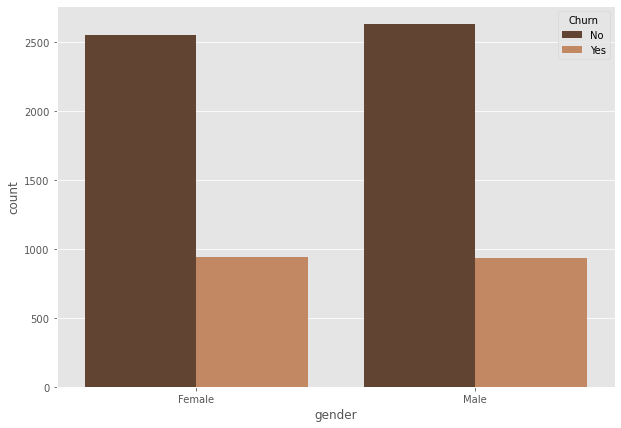

In [106]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(df['gender'],palette='copper',hue='Churn',data=df)

#### According to the Count Plot of "gender" column i can see "Male" customers are churned out highly.
#### "Female" customers are less churned.

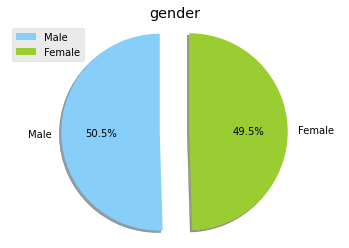

In [13]:
#  pie plot of gender 

labels = ['Male', 'Female']
value = [3555, 3488]
colors = ['lightskyblue','yellowgreen']
explode = [0.3,0]# 

plt.style.use('ggplot')
plt.title('gender')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

#### As I can see, from our data of around 7043 entries, about 50.47%('Male') of the customers have churned out.
#### The other 40.52%('Female') have stayed with the company.

#### SeniorCitizen vs churn

In [14]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

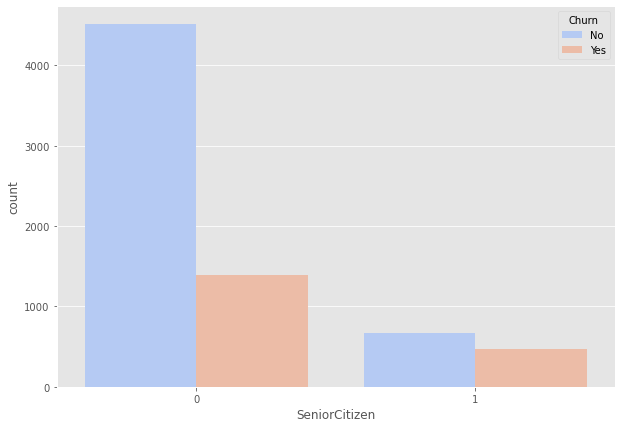

In [105]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(df['SeniorCitizen'],palette='coolwarm',hue='Churn',data=df)

#### From the above count plot i can analyze that "0" signifies 5901 person and "1" says 1142 person in these dataset.¶
#### So in short I can say that it doesn’t matter whether the customer is SeniorCitizen or not.

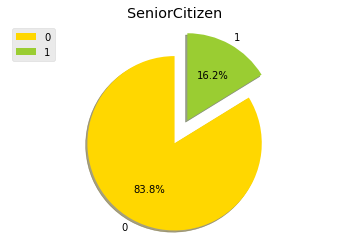

In [16]:
#  pie plot of SeniorCitizen 

labels = ['0', '1']
value = [5901, 1142]
colors = ['gold','yellowgreen']
explode = [0.3,0]# 

plt.style.use('ggplot')
plt.title('SeniorCitizen')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

#### As I can see, from our data of around 7043 entries, about 83.8%('0') of the SeniorCitizen customers have churned out.
#### The other 16.21%('1') have stayed with the company.

### Partner

In [17]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

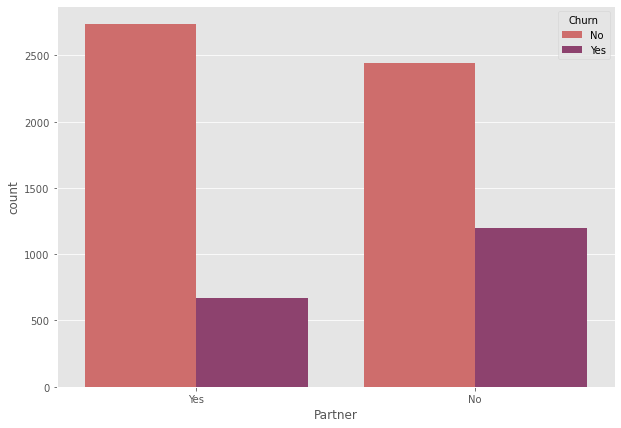

In [104]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(df['Partner'],palette='flare',hue='Churn',data=df)

#### From the above count plot i can analyze that "No" signifies 3641 person and "Yes" says 3402 customers in these dataset.
#### So in short I can say that single & Un-married customers are churned out.

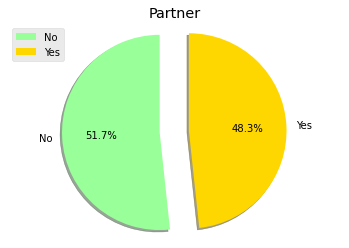

In [21]:
#  pie plot of Partner 

labels = ['No', 'Yes']
value = [3641, 3402]
colors = ['#99ff99','gold']
explode = [0.3,0]# 

plt.style.use('ggplot')
plt.title('Partner')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

#### No partner relationship customers with 51.69% churn ratio are disappointed with the service of the company.

# Dependents

In [22]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

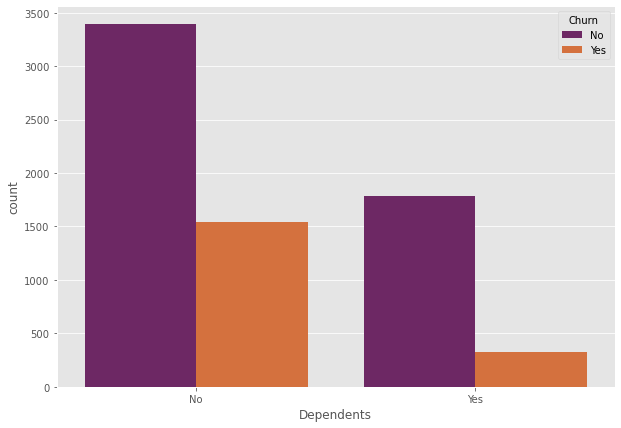

In [103]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(df['Dependents'],palette='inferno',hue='Churn',data=df)

#### Out of the above count plot i can say there are less dependents customers in this dataset.¶
#### Mainly of them are Single & Un-married.

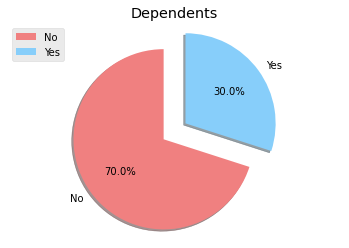

In [24]:
#  pie plot of Dependents 

labels = ['No', 'Yes']
value = [4933, 2110]
colors = ['lightcoral','lightskyblue']
explode = [0.3,0]# 

plt.style.use('ggplot')
plt.title('Dependents')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

##### 'No'Dependents customer with 70.04% is churning the company rather than 'Yes' Dependents having 29.95% are staying with the service provide to them.

# PhoneService

In [25]:
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

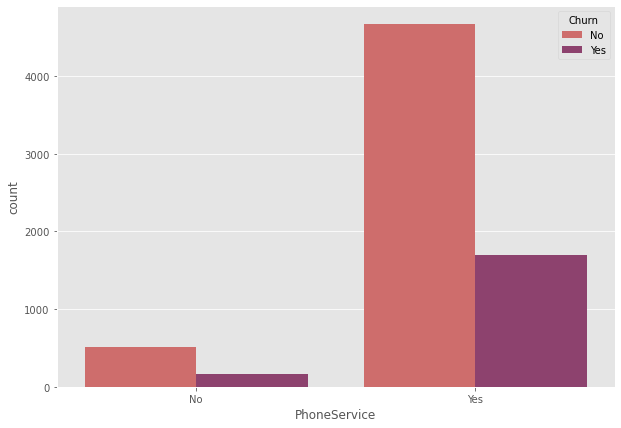

In [101]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(df['PhoneService'],palette='flare',hue='Churn',data=df)

##### 'Yes'(6361) signifies Most of the customers has a landline phone service along with the internet service.
##### 'No'(682) tells those customer doesn"t use Phone Service.

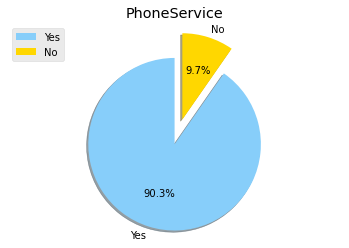

In [29]:
#  pie plot of PhoneService 

labels = ['Yes', 'No']
value = [6361, 682]
colors = ['lightskyblue','gold']
explode = [0.3,0]# 

plt.style.use('ggplot')
plt.title('PhoneService')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

##### From the above pie plot speaks 'Yes' with 90.31% customers uses Phone Service and the rest 9.68% dosen't use services.¶

# MultipleLines

In [31]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

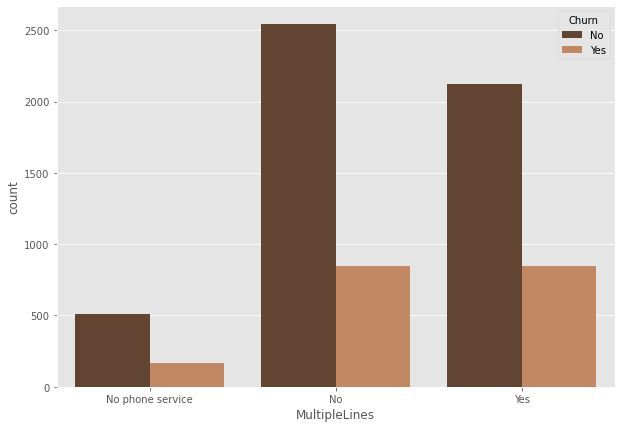

In [100]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(df['MultipleLines'],palette='copper',hue='Churn',data=df)

#### 'No' tells 3390 customers have one line of internet connectivity,
#### 'Yes' shows 2971 customers have more than one internet connectivity and 'No Phone Service' speaks these customers are not interested in any internet service.

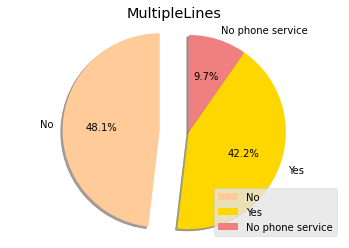

In [36]:
#  pie plot of MultipleLines 

labels = ['No', 'Yes', 'No phone service']
value = [3390, 2971, 682]
colors = ['#ffcc99','gold','lightcoral']
explode = [0.3,0,0]# 

plt.style.use('ggplot')
plt.title('MultipleLines')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='lower right')
plt.show()

#### From the above pie plot i can see 49.13% customers use one conectivity of internet service.

# InternetService

In [37]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

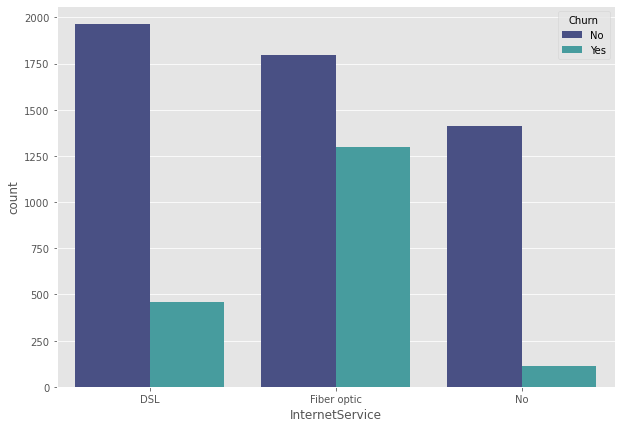

In [98]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(df['InternetService'],palette='mako',hue='Churn',data=df)

#### 3096 of the customers uses Fiber optic Internet service to get smooth consumption of internet.
#### 2421 customers consumes DSL internet service and 1526 uses internt of another conectivity.

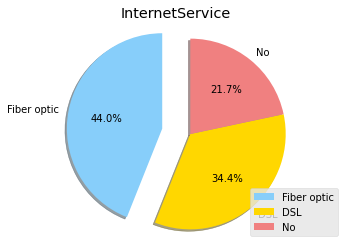

In [41]:
#  pie plot of InternetService 

labels = ['Fiber optic', 'DSL', 'No']
value = [3096, 2421, 1526]
colors = ['lightskyblue','gold','lightcoral']
explode = [0.3,0,0]# 

plt.style.use('ggplot')
plt.title('InternetService')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='lower right')
plt.show()

#### Fiber optic with 43.95% are been used by wide range of customers to obtain smooth internet service

# OnlineSecurity

In [42]:
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

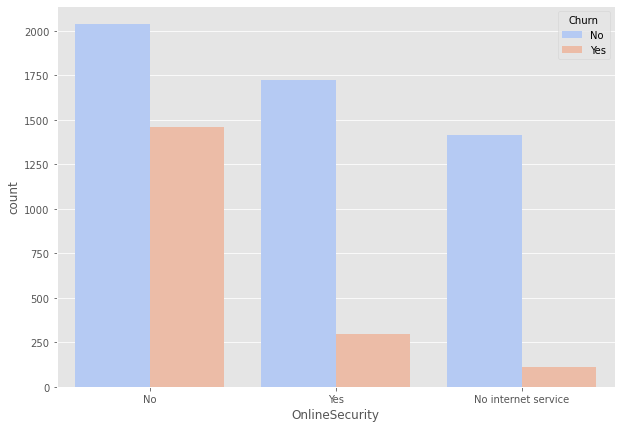

In [97]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(df['OnlineSecurity'],palette='coolwarm',hue='Churn',data=df)

#### From the above plot i can say 3498 customers uses internet without security and through which this causes several cyber attacks to the internet users.
#### 'Yes' shows 2019 customers are very much conscious about the security.
#### 'No internet service tells' 1526 customers are inactive in using internet service.

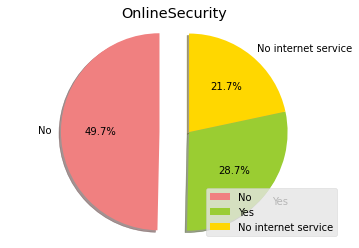

In [44]:
#  pie plot of OnlineSecurity 

labels = ['No', 'Yes', 'No internet service']
value = [3498, 2019, 1526]
colors = ['lightcoral','yellowgreen','gold']
explode = [0.3,0,0]# 

plt.style.use('ggplot')
plt.title('OnlineSecurity')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='lower right')
plt.show()

# OnlineBackup

In [45]:
df['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

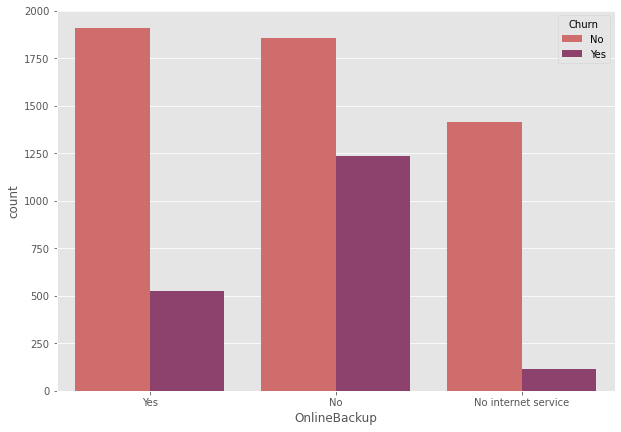

In [96]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(df['OnlineBackup'],palette='flare',hue='Churn',data=df)

#### 3088 customers has No online backup.
#### 2429 customers have online backup for having all time internet connectivity.
#### While 1526 customer dosen't have internet connection so they are free from online backup.

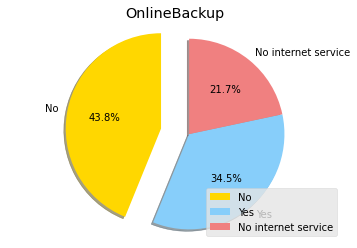

In [48]:
#  pie plot of OnlineBackup 

labels = ['No', 'Yes', 'No internet service']
value = [3088, 2429, 1526]
colors = ['gold','lightskyblue','lightcoral']
explode = [0.3,0,0]# 

plt.style.use('ggplot')
plt.title('OnlineBackup')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='lower right')
plt.show()

##### According to the pie pot I can visualize 43.84% customer dosen't have online backup which causes them problem in using internet for fututre purpose..

# DeviceProtection

In [49]:
df['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

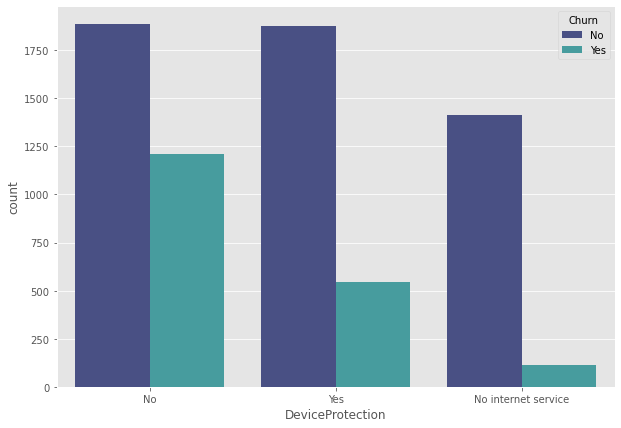

In [95]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(df['DeviceProtection'],palette='mako',hue='Churn',data=df)

##### Protection is a secret of been safe & secure for using internet service, but according to this count plot I can see 3095 customers has not opted device protection seurity.
##### 2422 customers have opted device protection which shows they are vey much safe of using internet service.
##### At the end 1526 customers are having no internet service.

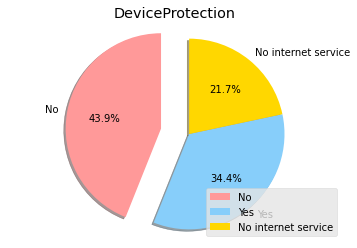

In [53]:
#  pie plot of DeviceProtection 

labels = ['No', 'Yes', 'No internet service']
value = [3095, 2422, 1526]
colors = ['#ff9999','lightskyblue','gold']
explode = [0.3,0,0]# 

plt.style.use('ggplot')281
plt.title('DeviceProtection')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='lower right')
plt.show()

#### By the help of pie plot i can see 43.94% customers has no device protection which specify they are carelessly using internet service without any fear of cyber attacks.
#### Along with this 34.38% customers are conscious about there device protection and 21.66% customers have no role in internet service.

# TechSupport

In [54]:
df['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

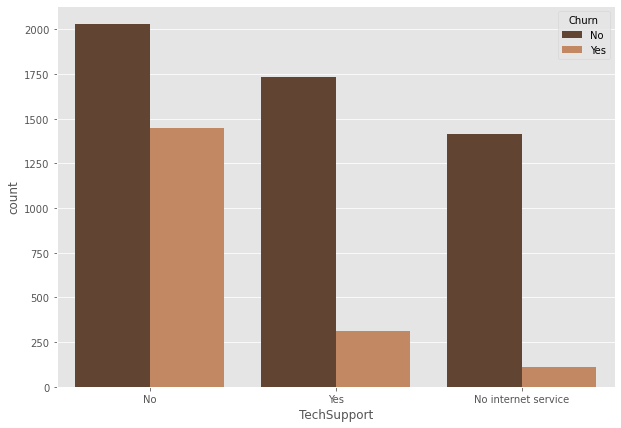

In [94]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(df['TechSupport'],palette='copper',hue='Churn',data=df)

#### 3473 customers has not opted for tech support by which it shows how much they are careless about Internet service.
#### 2044 customer has recieved tech support which says they got the backup from the company and 1526 never taken internet connnection so they are unable to opt techsupport. .

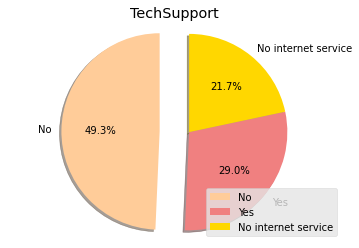

In [58]:
#  pie plot of TechSupport 

labels = ['No', 'Yes', 'No internet service']
value = [3473, 2044, 1526]
colors = ['#ffcc99','lightcoral','gold']
explode = [0.3,0,0]# 

plt.style.use('ggplot')
plt.title('TechSupport')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='lower right')
plt.show()

#### Technical support is the main srevice support which sholud be given by the internet provider.
#### According to this pie plot 29.02% customers have gain the benefit of technical support and 49.31% customers have not got the tech support which shows they were not interested in using this internet connectivity.
#### Although remaining 21.66% has never required to face tech support because they have not opted internet service.

# StreamingTV

In [59]:
df['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

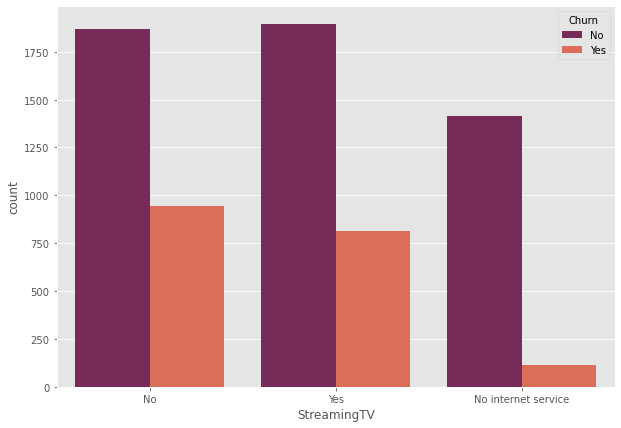

In [92]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(df['StreamingTV'],palette='rocket',hue='Churn',data=df)

#### 2707 customers has an option of TV streaming in internet service.
#### 2810 customers deny to choose the option of Streaming TV and 1526 customers has neither taken internet service so it is unable for them to take this option.

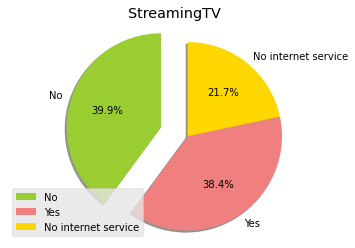

In [62]:
#  pie plot of StreamingTV 

labels = ['No', 'Yes', 'No internet service']
value = [2810, 2707, 1526]
colors = ['yellowgreen','lightcoral','gold']
explode = [0.3,0,0]# 

plt.style.use('ggplot')
plt.title('StreamingTV')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='lower left')
plt.show()

#### After choosing internet service 38.43% has taken streaming TV option with internet connectivity..
#### While 39.89% have not not taken TV option in there subjective internet package and 21.66% has no internet connection.

# StreamingMovies

In [63]:
df['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

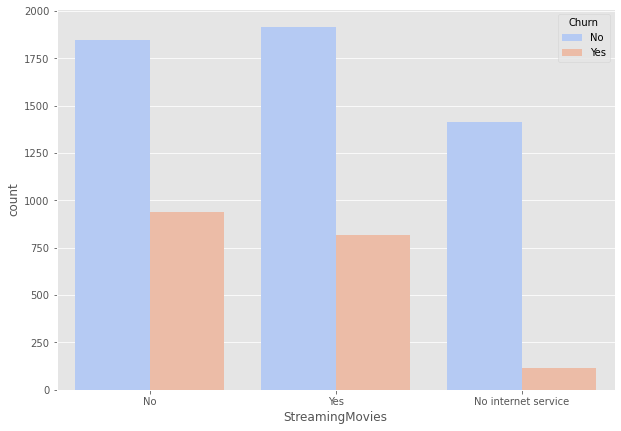

In [91]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(df['StreamingMovies'],palette='coolwarm',hue='Churn',data=df)

#### 2732 customers has an option of StreamingMovies in internet service.
#### 2785 customers deny to choose the option of StreamingMovies and 1526 customers has neither taken internet service so it is unable for them to take this option.

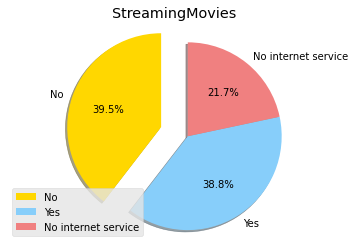

In [66]:
#  pie plot of StreamingMovies 

labels = ['No', 'Yes', 'No internet service']
value = [2785, 2732, 1526]
colors = ['gold','lightskyblue','lightcoral']
explode = [0.3,0,0]# 

plt.style.use('ggplot')
plt.title('StreamingMovies')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='lower left')
plt.show()

#### After choosing internet service 38.79% has taken StreamingMovies option with internet connectivity..
#### While 39.54% have not not taken StreamingMovies option in there subjective internet package and 21.66% has no internet connection.

# Contract

In [67]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

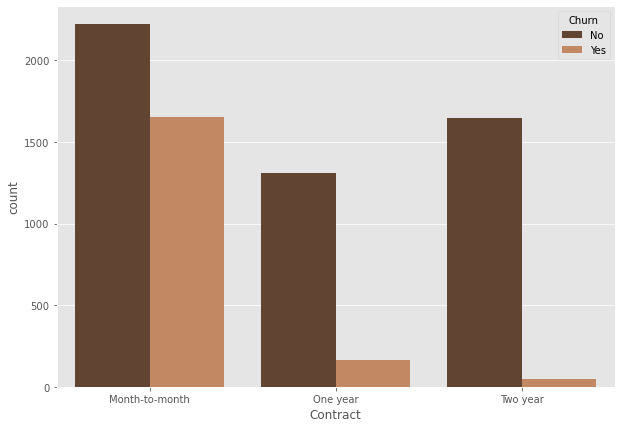

In [88]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(df['Contract'],palette='copper',hue='Churn',data=df)

### Contact of a internet connection binds customers not to switch to another innernet connectivity company.
### So by this count plot I can see 3875 customers uses Monthly subscription plan, 1695 customers uses Two-year contract for internet connection and 1473 customers uses one year contract in this company.

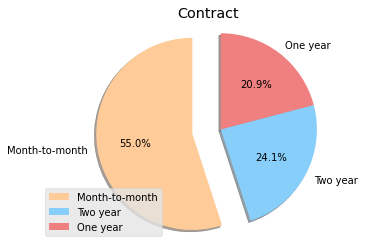

In [69]:
#  pie plot of Contract 

labels = ['Month-to-month', 'Two year', 'One year']
value = [3875, 1695, 1473]
colors = ['#ffcc99','lightskyblue','lightcoral']
explode = [0.3,0,0]# 

plt.style.use('ggplot')
plt.title('Contract')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='lower left')
plt.show()

#### According to these pie plot i can see 55.01% customers has taken monthly contract of internet service.
#### And else 24.06% customers have taken two-year contract while 20.91% has recieved one-year contract of internet connectivity.

# PaperlessBilling

In [70]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

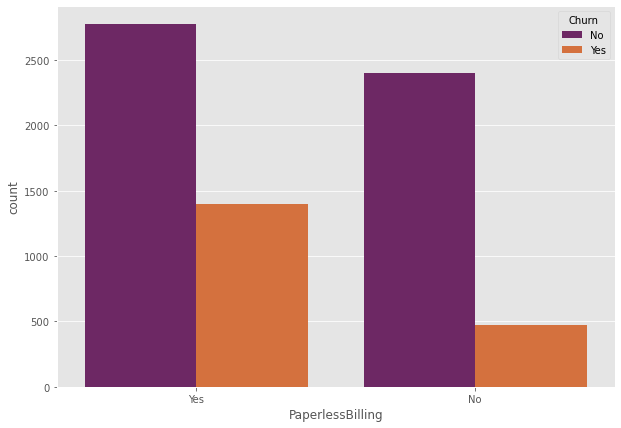

In [85]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(df['PaperlessBilling'],palette='inferno',hue='Churn',data=df)

#### After taking subscription of internet service every customer should recieve payment reciept through billing method.
#### As this plot shows 4171 customers has opted internet service billing reciept.
#### While, 2872 customers has not taken the reciept bill.

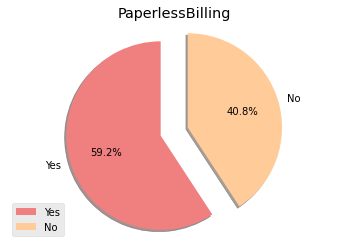

In [72]:
#  pie plot of PaperlessBilling 

labels = ['Yes', 'No']
value = [4171, 2872]
colors = ['lightcoral','#ffcc99']
explode = [0.3,0]# 

plt.style.use('ggplot')
plt.title('PaperlessBilling')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='lower left')
plt.show()

#### Custmoers taking paperbilling receipt has 59.22% and those not taking has 40.77% ratio.

# PaymentMethod

In [73]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

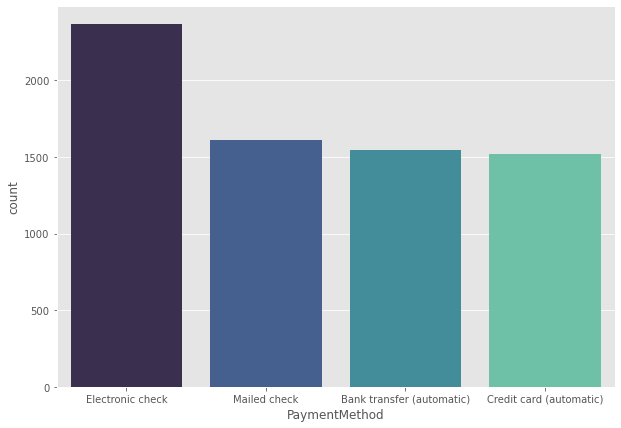

In [75]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(df['PaymentMethod'],palette='mako',data=df)

#### Electronic check customers(2365) are the highest paying customers of internet service and it is paid digitally.
#### Then comes Mailed Check customers (1612) are the second highest paynig customers of Internet connection.
#### Payment method through Bank transfer (automatic) are (1544) customers.
#### And at last credit card paymnet method with (1522) customers.

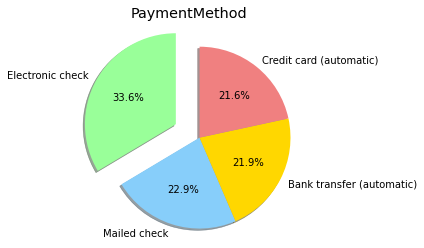

In [81]:
#  pie plot of PaymentMethod 

labels = ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
value = [2365, 1612, 1544,1522]
colors = ['#99ff99','lightskyblue','gold','lightcoral',]
explode = [0.3,0,0,0]# 

plt.style.use('ggplot')
plt.title('PaymentMethod')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### As I can see through Pie plot that Electronic check payment method is widely used with 33.57% and rest are using Mailed check,Bank transfer (automatic),Credit card (automatic) with 22.88%,21.92%, & 21.61% for bill payments.

# Churn

In [82]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

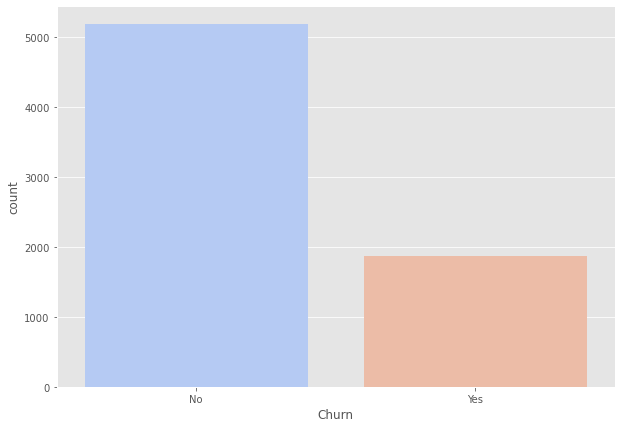

In [89]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(df['Churn'],palette='coolwarm',data=df)

#### 5174 customers has stayed in the comapny while 1869 customers had leaved the company.

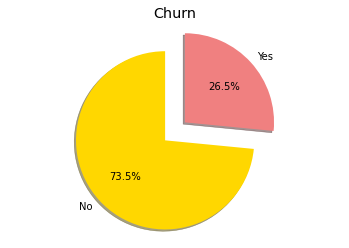

In [90]:
#  pie plot of Churn 

labels = ['No', 'Yes']
value = [5174, 1869]
colors = ['gold','lightcoral',]
explode = [0.3,0]# 

plt.style.use('ggplot')
plt.title('Churn')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### 73.5% of custoers are staying and the rest 26.5% customers are leaving the company.

In [13]:
# dropping the unwanted columns 
df.drop('customerID',inplace=True,axis=1)
df.drop('TotalCharges',inplace=True,axis=1)

In [14]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [15]:
df.shape

(7043, 19)

##### From the above coding I have dropped the Un-Wanted columns and use head() & shape code to get the summary of dataset after Data Visualization.

# Label Encoder

### Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [16]:
le = LabelEncoder()
df.gender = le.fit_transform(df.gender)
df.Partner = le.fit_transform(df.Partner)
df.Dependents = le.fit_transform(df.Dependents)
df.PhoneService = le.fit_transform(df.PhoneService)
df.MultipleLines = le.fit_transform(df.MultipleLines)
df.InternetService = le.fit_transform(df.InternetService)
df.OnlineSecurity = le.fit_transform(df.OnlineSecurity)
df.OnlineBackup = le.fit_transform(df.OnlineBackup)
df.DeviceProtection = le.fit_transform(df.DeviceProtection)
df.TechSupport = le.fit_transform(df.TechSupport)
df.StreamingTV = le.fit_transform(df.StreamingTV)
df.StreamingMovies = le.fit_transform(df.StreamingMovies)
df.Contract = le.fit_transform(df.Contract)
df.PaperlessBilling = le.fit_transform(df.PaperlessBilling)
df.PaymentMethod = le.fit_transform(df.PaymentMethod)
df.Churn = le.fit_transform(df.Churn)

In [17]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1


In [18]:
df.describe(include='all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,1.000000


#### From the Above statistics data show that their multiple outliers mostly in many columns.
###### There is also difference between mean and 50% value in some of the columns which used to get fix for better prediction.
###### a) Also, number of rows in each column are not same, means there is no null values present in the data set.
###### b) Also, the mean and 50%value of most of the column are same and the STD and mean have a major difference to each other.
###### c) Most of the column statistics data are near to 0 values.
###### d) By checking the difference between the 75% and max value there are outliers in some of the column, I will check it soon.

# Distribution Plot

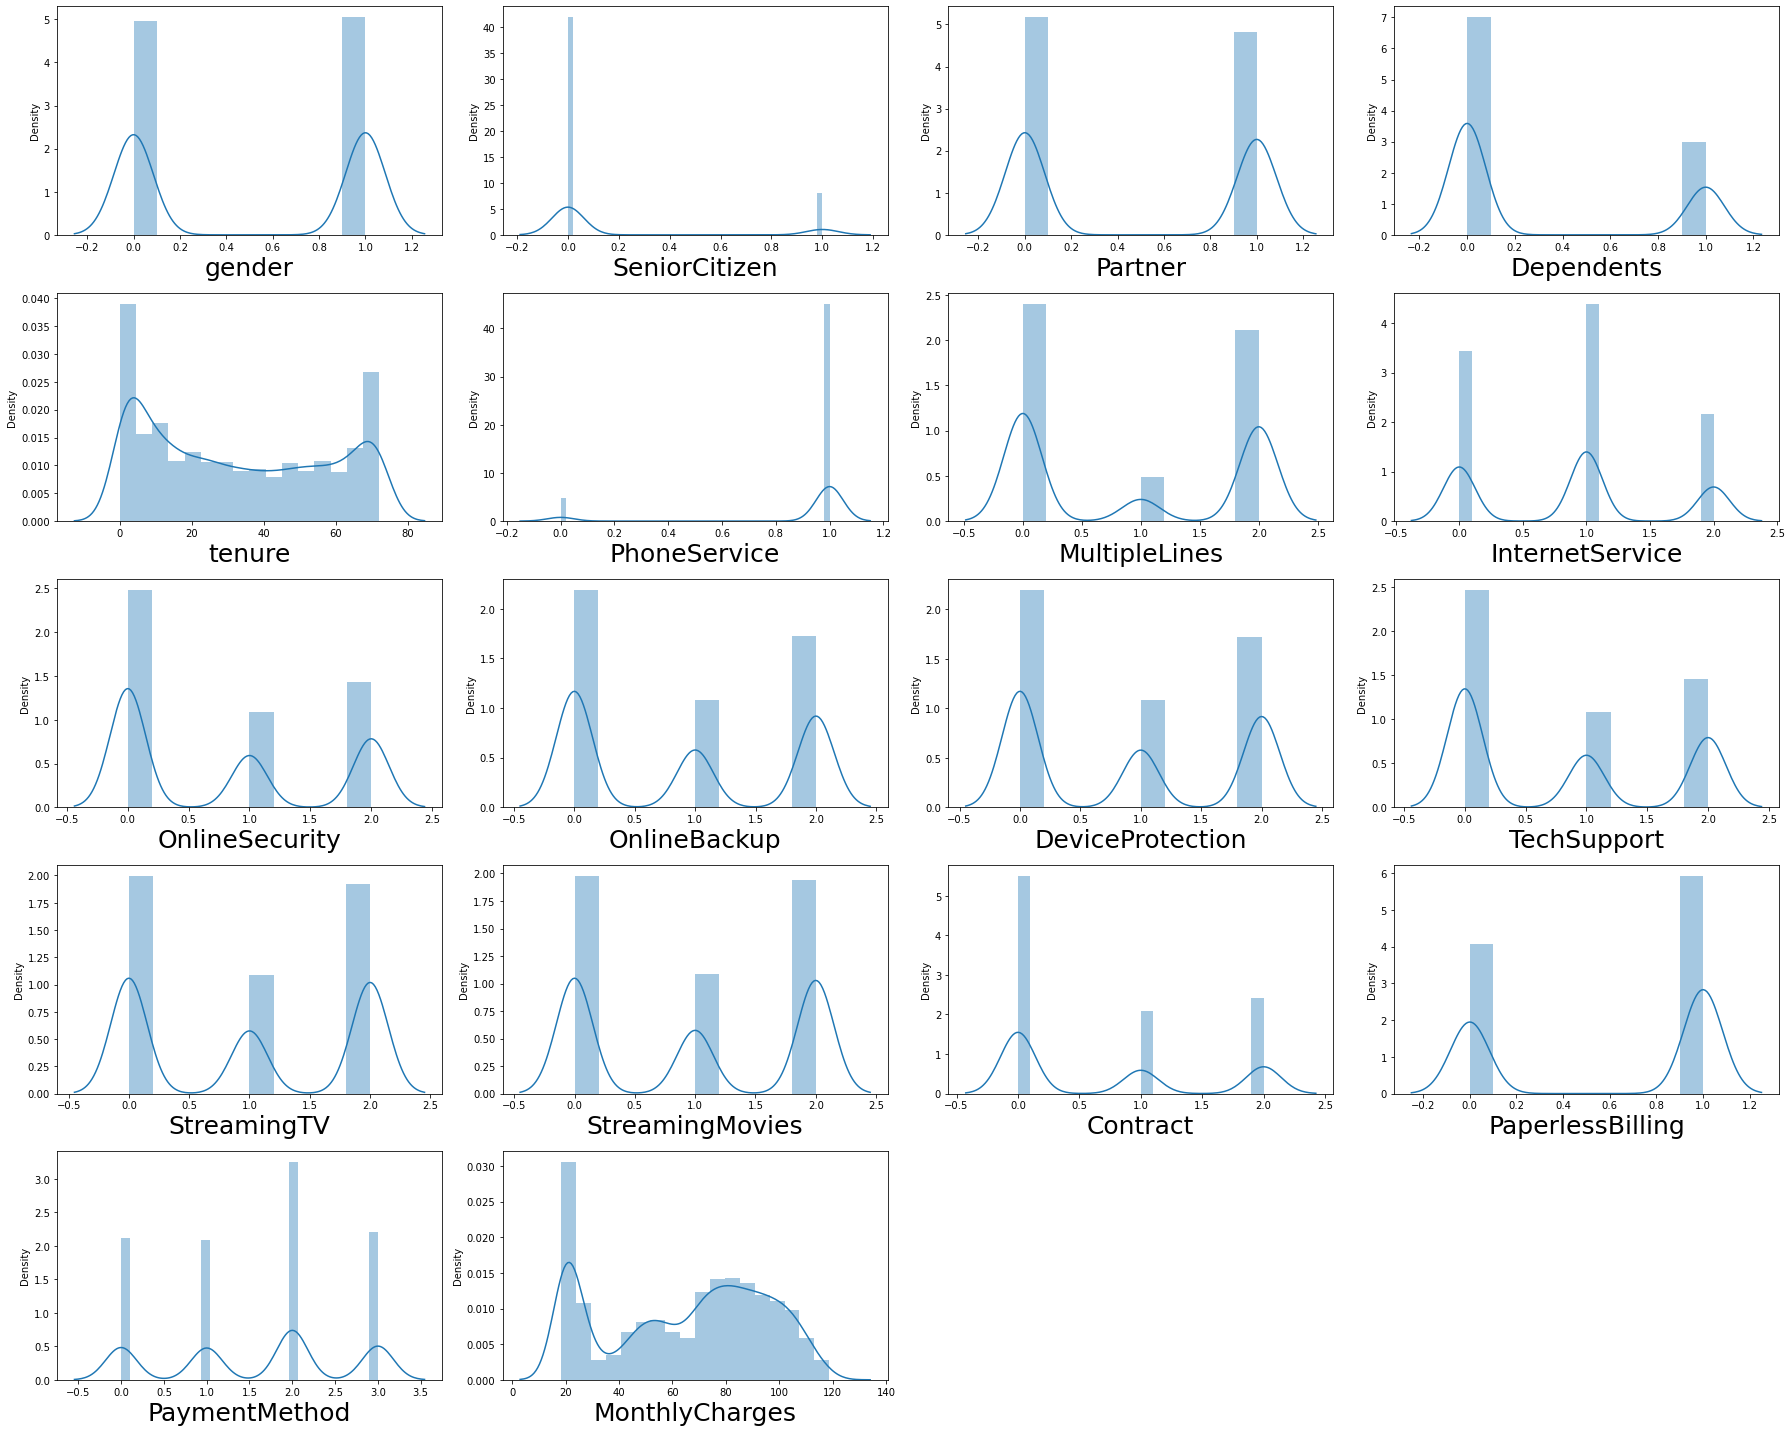

In [19]:
# using the the distribution plot 

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=18:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

#### From the above Distribution Plot I can see that there are skewness in this dataset.

# Histogram Plot

#### Histograms group the data in bins and is the fastest way to get idea about the distribution of each attribute in dataset.
#### THe following are some of the characteristics of histograms:
#### a)provides us a count of the number of observations in each bin created for visualization.¶
#### b)From the shape of the bin, I can easily observe the distribution i.e. Churn it is Gaussian, skewed or exponential.
#### Histograms also help us to see possible outliers.

array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'Partner'}>,
        <AxesSubplot:title={'center':'Dependents'}>],
       [<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'PhoneService'}>,
        <AxesSubplot:title={'center':'MultipleLines'}>,
        <AxesSubplot:title={'center':'InternetService'}>],
       [<AxesSubplot:title={'center':'OnlineSecurity'}>,
        <AxesSubplot:title={'center':'OnlineBackup'}>,
        <AxesSubplot:title={'center':'DeviceProtection'}>,
        <AxesSubplot:title={'center':'TechSupport'}>],
       [<AxesSubplot:title={'center':'StreamingTV'}>,
        <AxesSubplot:title={'center':'StreamingMovies'}>,
        <AxesSubplot:title={'center':'Contract'}>,
        <AxesSubplot:title={'center':'PaperlessBilling'}>],
       [<AxesSubplot:title={'center':'PaymentMethod'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>,
        <A

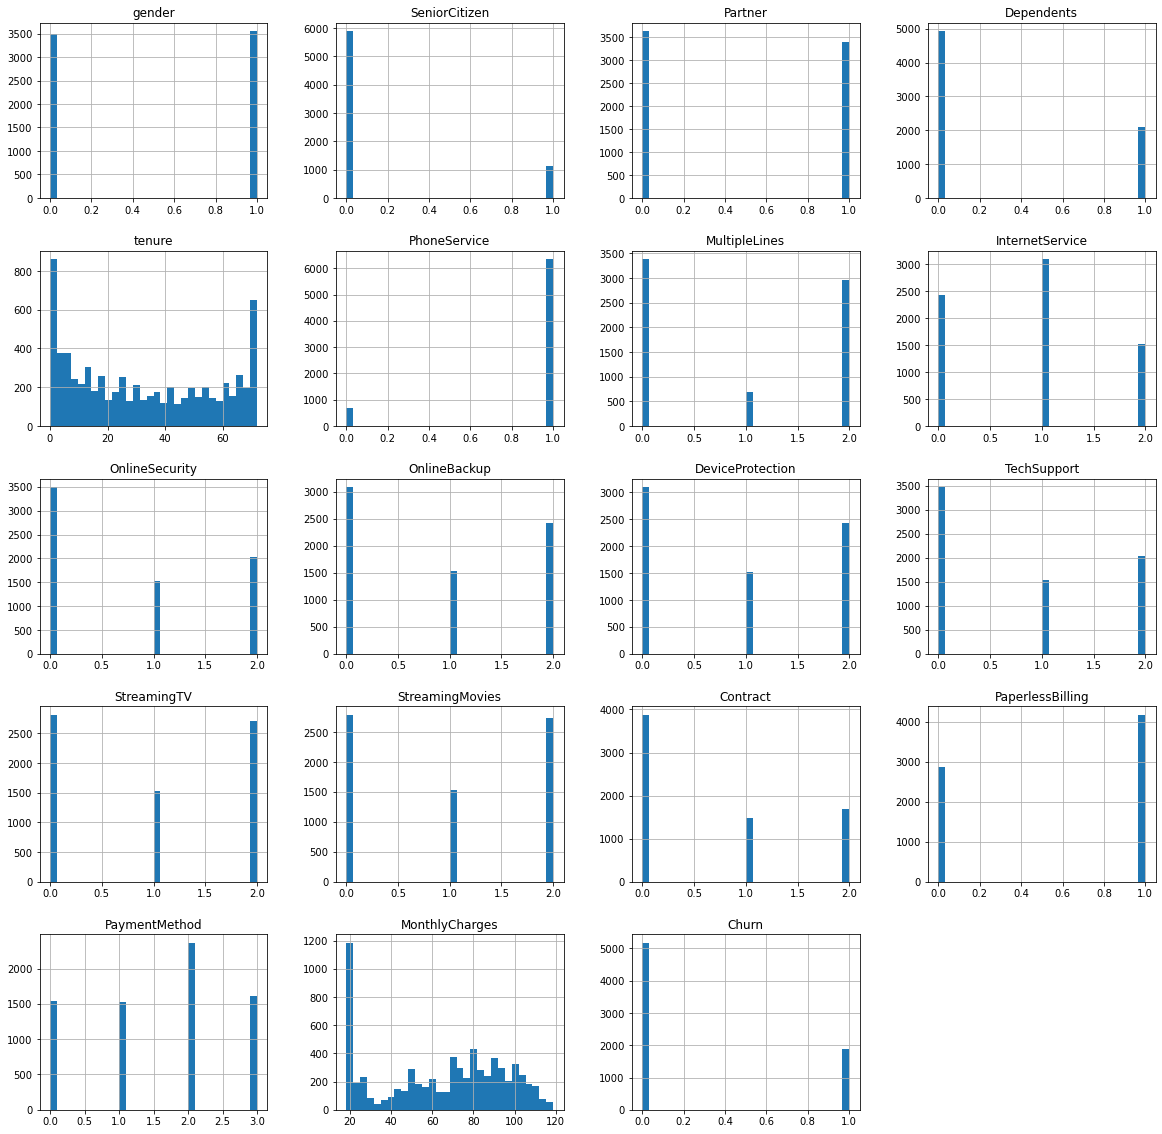

In [20]:
df.hist(figsize=(20,20),grid=True,layout=(5,4),bins=30)

# Replacing zero value from tenure column

In [21]:
# Replacing continous columns with mean
df['tenure'] = df['tenure'].replace(0,df['tenure'].mean())

###### After understanding the Describe I got that in this dataset there are zero values which I have replace with mean because all the zero value column are continuous in nature.

# Box Plot

gender                 AxesSubplot(0.125,0.749828;0.168478x0.130172)
SeniorCitizen       AxesSubplot(0.327174,0.749828;0.168478x0.130172)
Partner             AxesSubplot(0.529348,0.749828;0.168478x0.130172)
Dependents          AxesSubplot(0.731522,0.749828;0.168478x0.130172)
tenure                 AxesSubplot(0.125,0.593621;0.168478x0.130172)
PhoneService        AxesSubplot(0.327174,0.593621;0.168478x0.130172)
MultipleLines       AxesSubplot(0.529348,0.593621;0.168478x0.130172)
InternetService     AxesSubplot(0.731522,0.593621;0.168478x0.130172)
OnlineSecurity         AxesSubplot(0.125,0.437414;0.168478x0.130172)
OnlineBackup        AxesSubplot(0.327174,0.437414;0.168478x0.130172)
DeviceProtection    AxesSubplot(0.529348,0.437414;0.168478x0.130172)
TechSupport         AxesSubplot(0.731522,0.437414;0.168478x0.130172)
StreamingTV            AxesSubplot(0.125,0.281207;0.168478x0.130172)
StreamingMovies     AxesSubplot(0.327174,0.281207;0.168478x0.130172)
Contract            AxesSubplot(0.

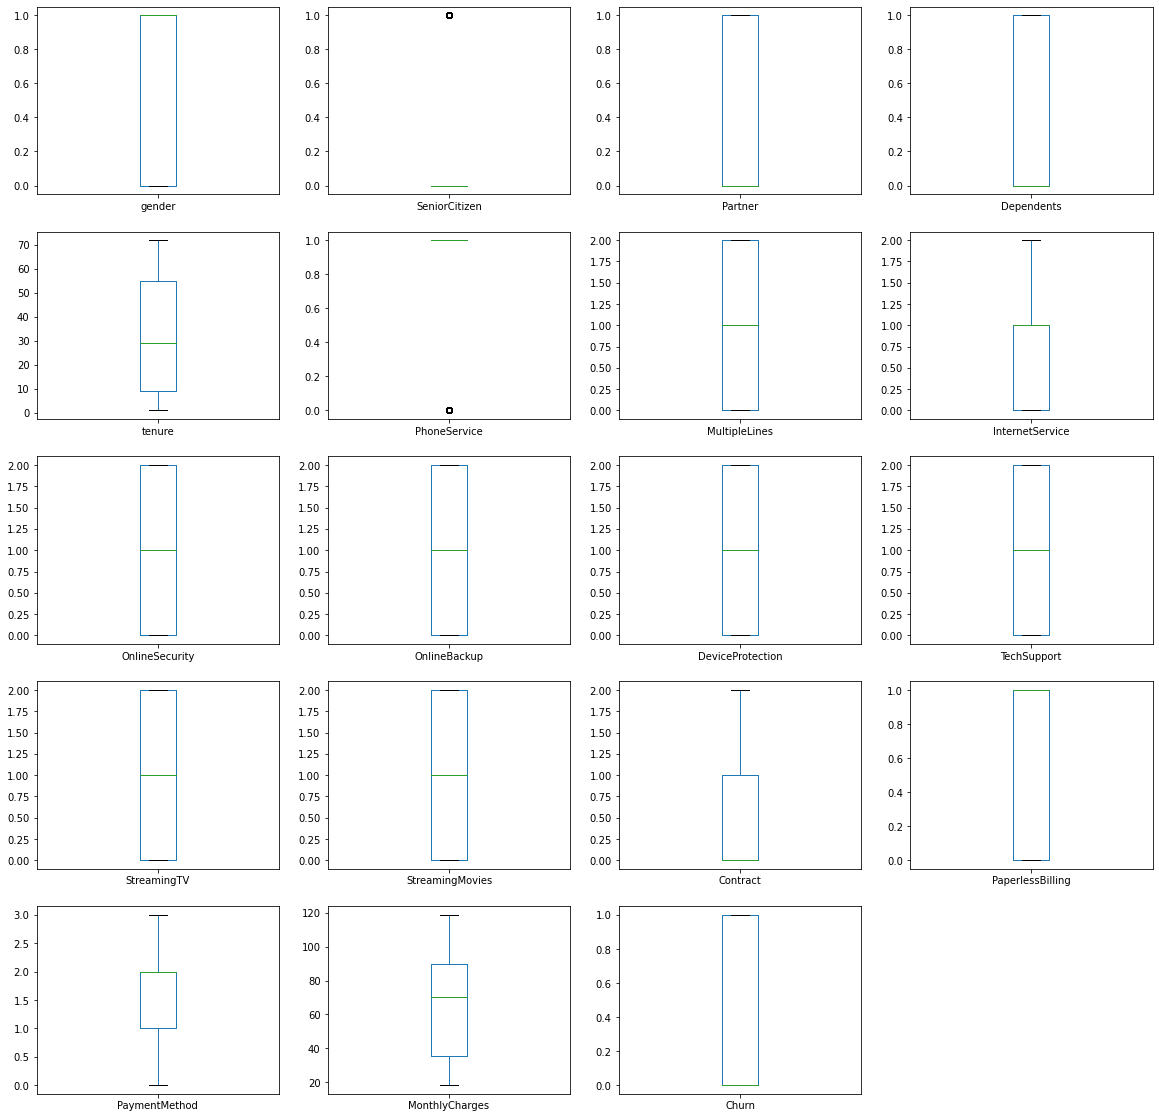

In [22]:
df.plot(kind='box',subplots=True,layout=(5,4),figsize=(20,20))

##### From above image I can clear see that there are number of black dots in most of the column which are referring to the outliers, so it means most of the data are outside the distribution.
##### So now I detect the outliers now the second step is to remove the outliers, there are different way to remove the outliers that are zscore values.

# Visualize the correlation

In [23]:
# find correlation of features vs target using corrwith

df.drop('Churn',axis=1).corrwith(df.Churn)

gender             -0.008612
SeniorCitizen       0.150889
Partner            -0.150448
Dependents         -0.164221
tenure             -0.353947
PhoneService        0.011942
MultipleLines       0.038037
InternetService    -0.047291
OnlineSecurity     -0.289309
OnlineBackup       -0.195525
DeviceProtection   -0.178134
TechSupport        -0.282492
StreamingTV        -0.036581
StreamingMovies    -0.038492
Contract           -0.396713
PaperlessBilling    0.191825
PaymentMethod       0.107062
MonthlyCharges      0.193356
dtype: float64

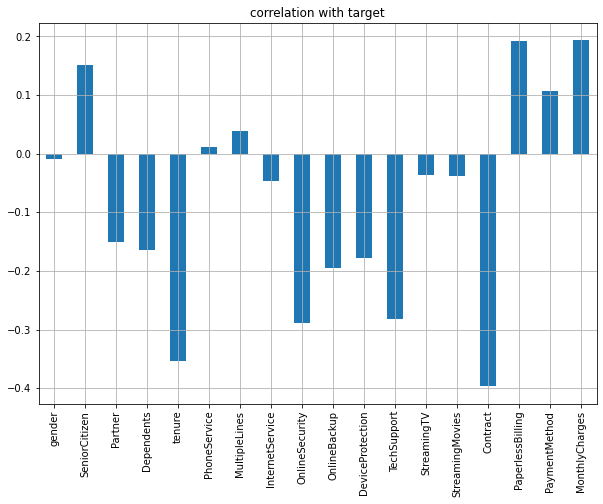

In [24]:
df.drop('Churn',axis=1).corrwith(df.Churn).plot(kind='bar',grid=True,figsize=(10,7),title="correlation with target")
plt.show()

#### I have checked the relationship between label and different features.¶
#### Most of the features are in minus value only 6 columns are positively related to target value.

# Correlation

#### Correlation Matrix is basically a covariance matrix. A summary measure called the correlation describes the strength of the linear association. Correlation summarizes the strength and direction of the linear (straight-line) association between two quantitative variables.¶
Denoted by r, it takes values between -1 and +1.

In [25]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005281,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.015683,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.381597,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.163082,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.164221
tenure,0.005281,0.015683,0.381597,0.163082,1.000000,0.007867,0.343431,-0.029791,0.327069,0.372239,0.372474,0.324520,0.290437,0.296653,0.675535,0.004821,-0.369592,0.246638,-0.353947
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.007867,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343431,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.029791,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.327069,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.372239,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,-0.195525


# Heatmap

#### I am using seaborn heatmap to plot the correlated matrix and plot the corr value in the heatmap graph

[]

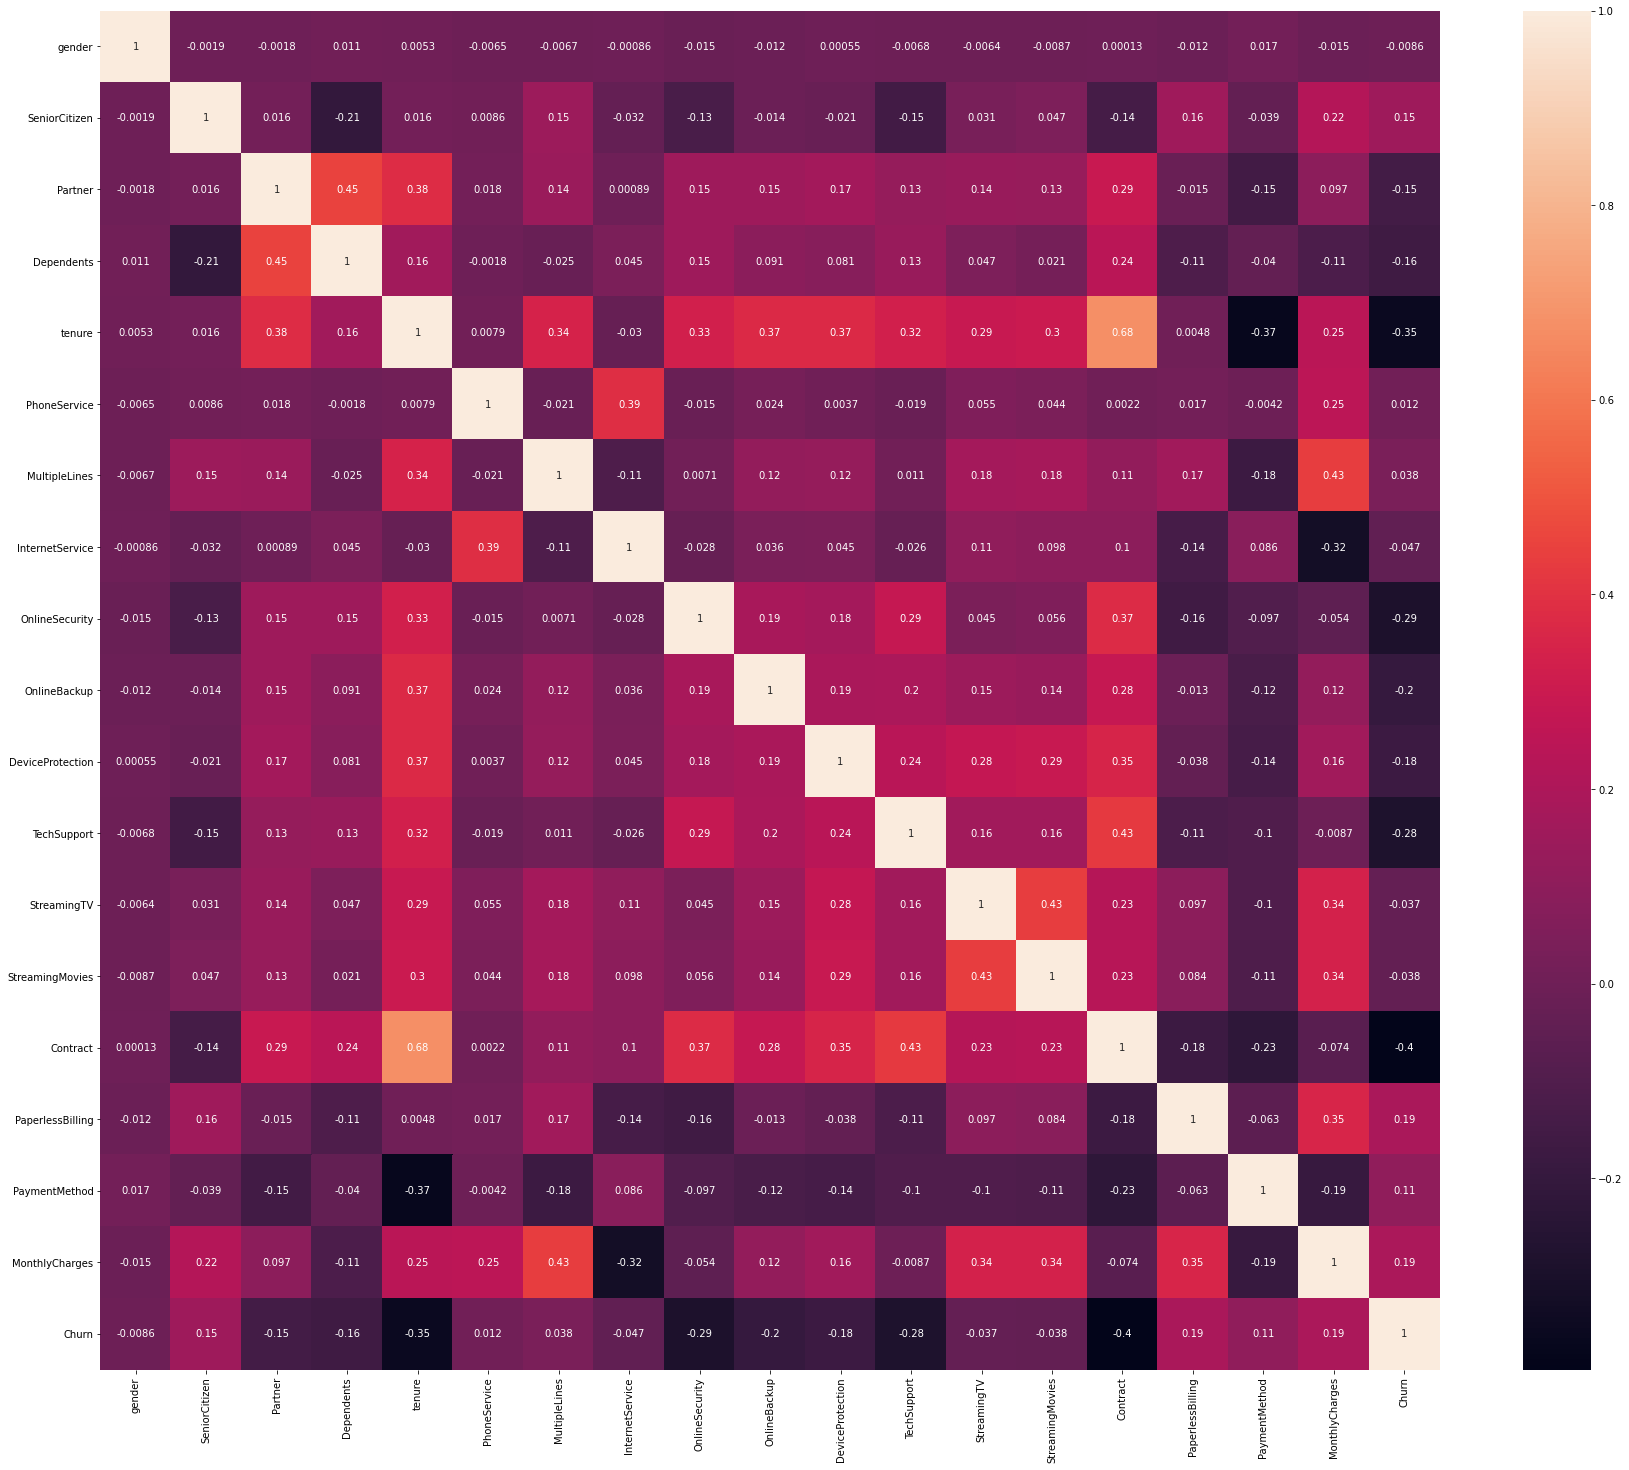

In [26]:
#checking the co-relation of all column to each other
df_cor = df.corr()
plt.figure(figsize=(30,25))
sns.heatmap(df_cor,annot=True)
plt.plot()

# 8. Machine Learning

In [27]:
# dividing features and label

x = df.drop('Churn',axis=1)
y = df.Churn

##### Separate response variable and features in x & y.

# StandardScaler

In [28]:
# standard scaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.00955867, -0.43991649,  1.03453023, ...,  0.8297975 ,
         0.39855772, -1.16032292],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -1.20511329,
         1.33486261, -0.25962894],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  0.8297975 ,
         1.33486261, -0.36266036],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ...,  0.8297975 ,
         0.39855772, -1.1686319 ],
       [ 0.99053183,  2.27315869,  1.03453023, ...,  0.8297975 ,
         1.33486261,  0.32033821],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  0.8297975 ,
        -1.47405205,  1.35896134]])

###### Applying the standard scaler to scaled the dataset in one range & on x variable.

# Scatter Plot

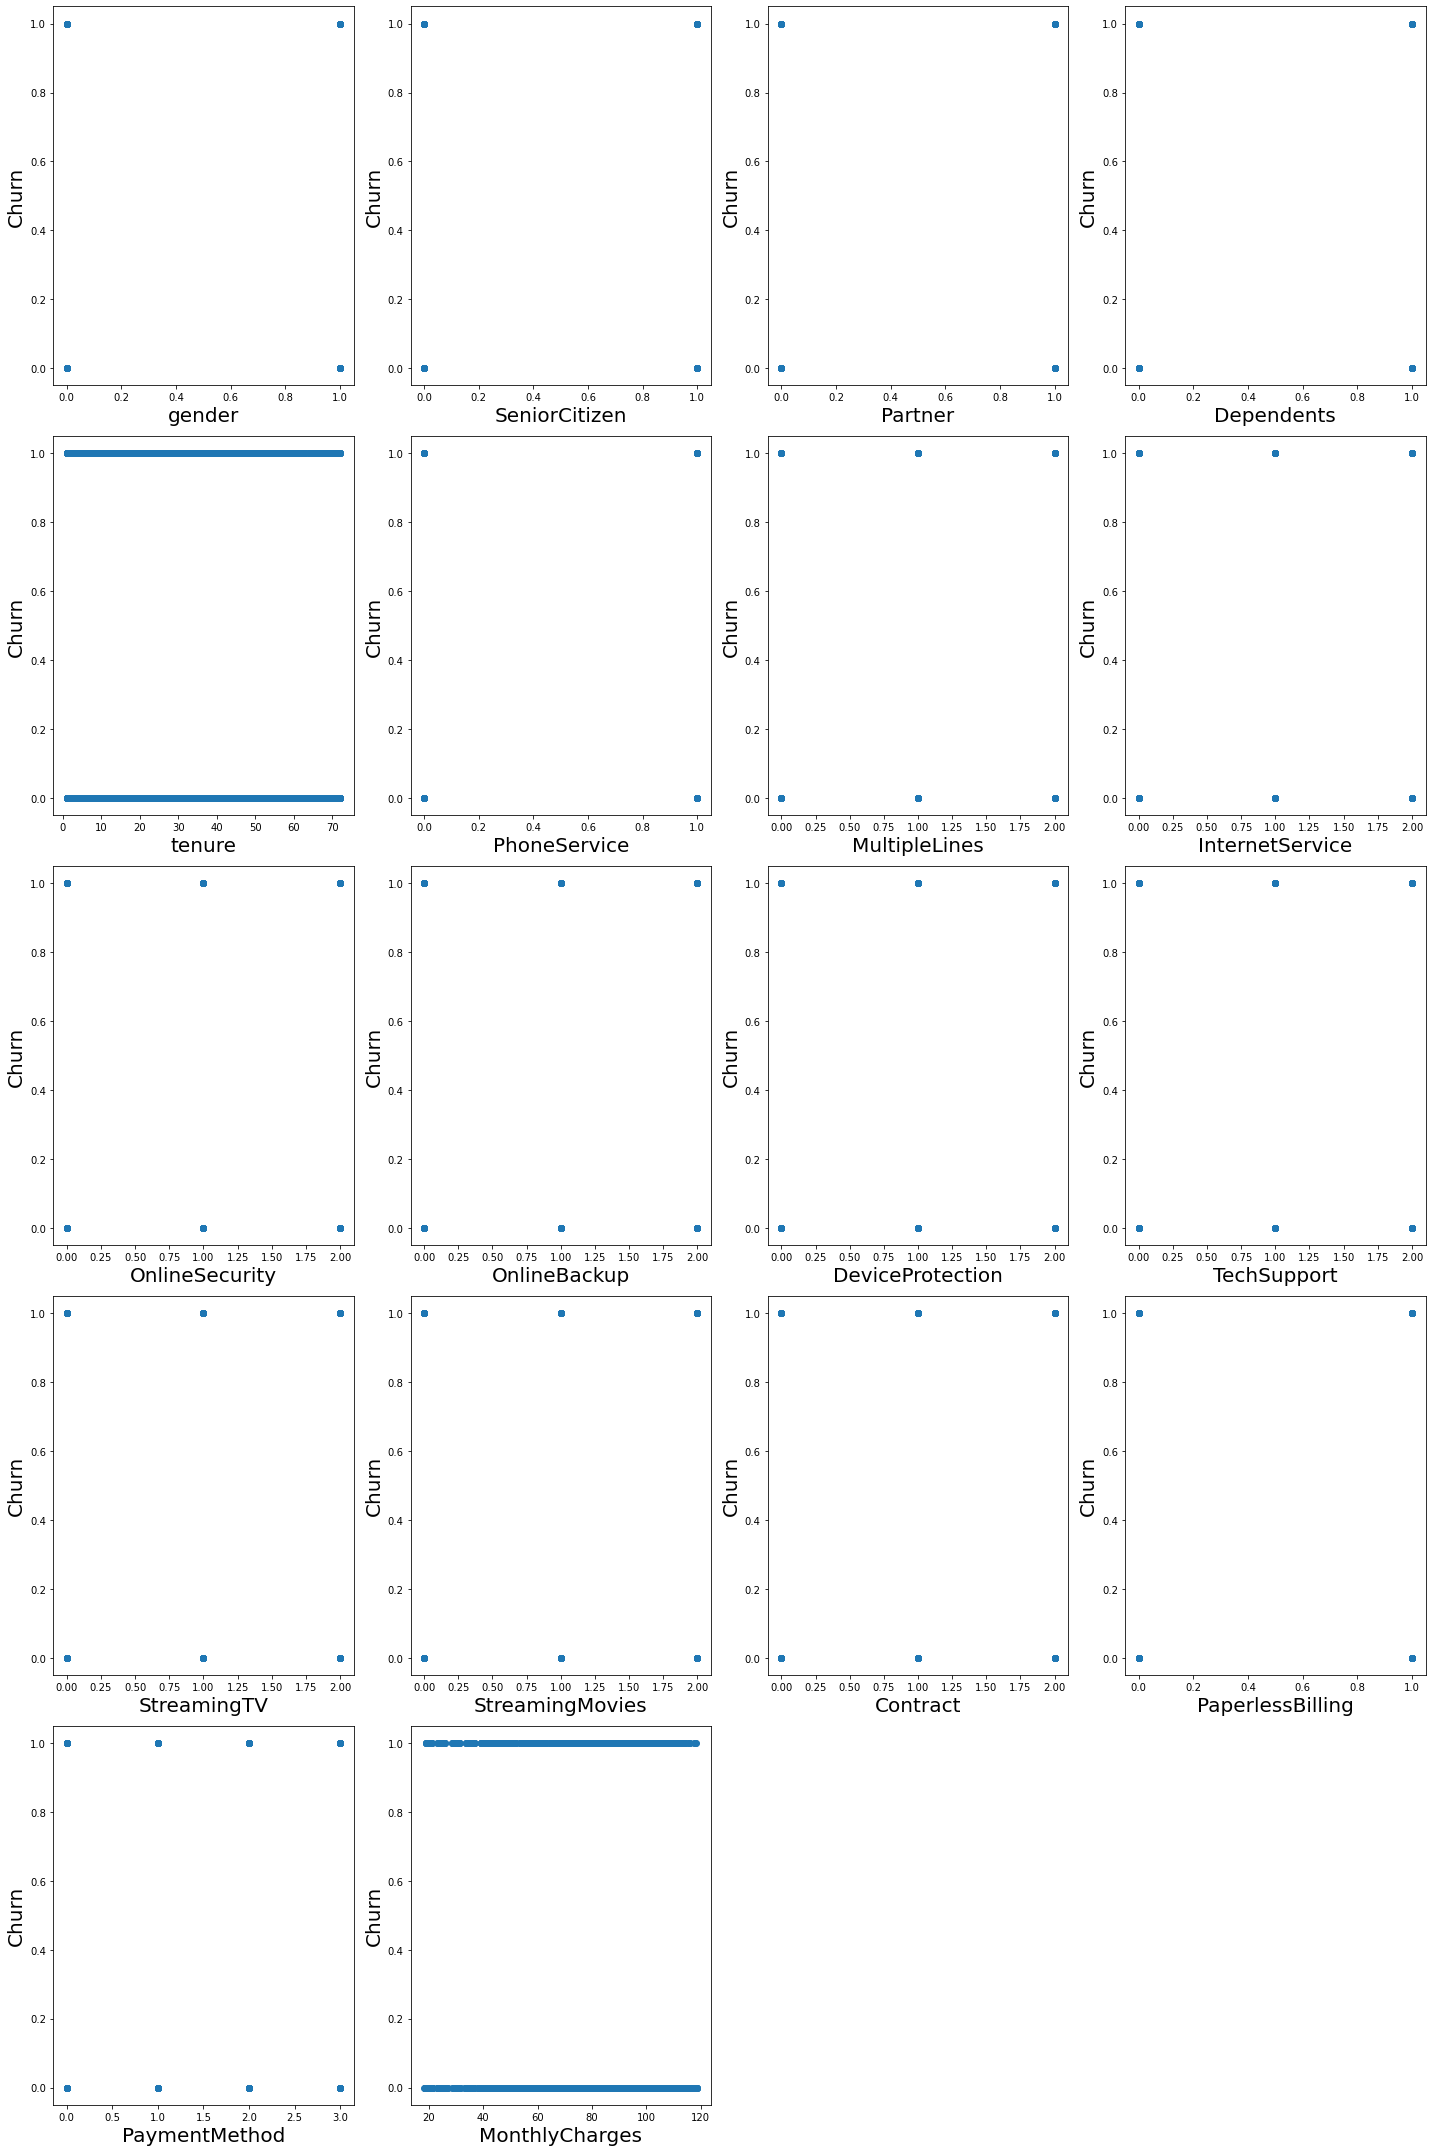

In [29]:
# visualizing the relationship
plt.figure(figsize=(20,30),facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=18:
        ax = plt.subplot(5,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Churn',fontsize=20)
        plotnumber +=1 
        plt.tight_layout()

# VIF - variance inflation factor

##### Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable

In [30]:
# finding variance inflation factor(vif)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.001700,gender
1,1.149735,SeniorCitizen
2,1.461472,Partner
3,1.381632,Dependents
4,2.789733,tenure
5,1.622403,PhoneService
6,1.392799,MultipleLines
7,1.825876,InternetService
8,1.247905,OnlineSecurity
9,1.186754,OnlineBackup


##### According to my concern about vif in this dataset all the values are less than 10 and overall model variance there is no multicollinearity exists.

# Model Building

#### A machine learning model is built by learning and generalizing from training data, then applying that acquired knowledge to new data it has never seen before to make predictions and fulfill its purpose. Lack of data will prevent you from building the model, and access to data isn't enough.
#### So in this dataset while predicting Attrition label , I have used these Algorithmns for Model Building:
#### a)Logistic Regression
#### b)RandomForestClassifier
#### c)Decision Tree Classifier
#### d)XGBoost Model¶
#### e)AdaBoostClassifier
#### f) KNN

# Train Test Split

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state = 370)

### Splitting the dataset into the Training set and Test set.
##### The data should be divided into train and test data.
##### I will use train_test_split feature to divide the data and I will be using testing set of 25% and a training set of 75% of the data.
##### I can set the random state of the split to ensure consistent results.

# KNN

##### The abbreviation KNN stands for “K-Nearest Neighbour”. It is a supervised machine learning algorithm. The algorithm can be used to solve both classification and regression problem statements. The number of nearest neighbours to a new unknown variable that has to be predicted or classified is denoted by the symbol 'K'.

# Using SelectKBest Method for best features selection

In [32]:
best_features = SelectKBest(score_func=f_classif,k=16)
fit = best_features.fit(x,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)

# concatenate DataFrame
feature_scores = pd.concat([df_columns,df_scores],axis = 1)
feature_scores.columns = ['Features_Name','Score']
print(feature_scores.nlargest(16,'Score'))

       Features_Name        Score
14          Contract  1315.088872
4             tenure  1008.421408
8     OnlineSecurity   643.162019
11       TechSupport   610.610024
9       OnlineBackup   279.877370
17    MonthlyCharges   273.463704
15  PaperlessBilling   268.985218
10  DeviceProtection   230.744618
3         Dependents   195.149314
1      SeniorCitizen   164.041424
2            Partner   163.060036
16     PaymentMethod    81.641664
7    InternetService    15.782320
13   StreamingMovies    10.447463
6      MultipleLines    10.201712
12       StreamingTV     9.434674


##### After Using SelectKBest method I understand Contract is the main cause of  of employees churned out.

# KNN model Building

#### k-NN is a type of classification where the function is only approximated locally and all computation is deferred until function evaluation. Since this algorithm relies on distance for classification, if the features represent different physical units or come in vastly different scales then normalizing the training data can improve its accuracy dramatically

In [33]:
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

##### First I have to fit the Training data of KNN.

In [34]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[1091,  195],
       [ 244,  231]], dtype=int64)

In [35]:
knn.score(x_test,y_test)

0.750709823963657

In [36]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1286
           1       0.54      0.49      0.51       475

    accuracy                           0.75      1761
   macro avg       0.68      0.67      0.67      1761
weighted avg       0.74      0.75      0.75      1761



#### According to my perception of modelling KNeighborsClassifier I got Accuracy Score : 75%.
#### But this score can improve the accuracy by using Grid Search CV.

# Let use Grid search CV for the best parameter to improve the accuracy

In [37]:
param_grid = {'algorithm':['kd_tree','brute'],
             'leaf_size':[15,18],
             'n_neighbors':[3,5,7]
             }

In [38]:
gridsearch = GridSearchCV(estimator=knn,param_grid=param_grid)

In [39]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [15, 18], 'n_neighbors': [3, 5, 7]})

In [40]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 7}

In [41]:
# we will use the best parameters in our knn algorithm and check if accuracy is increasing.
knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 15, n_neighbors=7)

In [42]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=15, n_neighbors=7)

In [43]:
y_pred = knn.predict(x_test)

In [44]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[1098,  188],
       [ 235,  240]], dtype=int64)

In [45]:
knn.score(x_test,y_test)

0.7597955706984668

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1286
           1       0.56      0.51      0.53       475

    accuracy                           0.76      1761
   macro avg       0.69      0.68      0.69      1761
weighted avg       0.75      0.76      0.76      1761



Text(0.5, 1.0, 'KNeighborsClassifier')

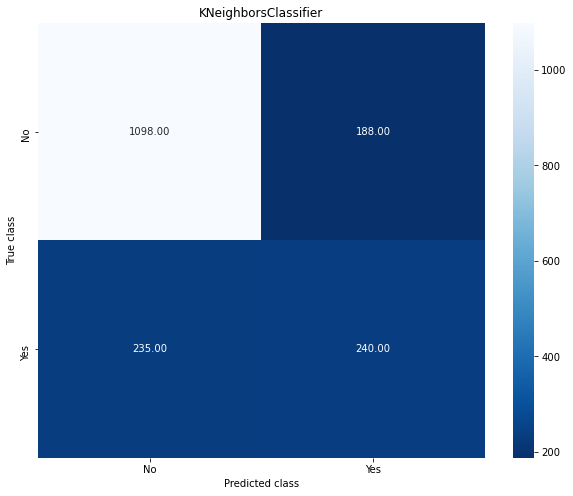

In [47]:
# Finding classification report
print(classification_report(y_test, y_pred))


plt.figure(figsize=(10,8))
sns.heatmap(cfm, annot=True, fmt='.2f',xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"] ,cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('KNeighborsClassifier')

#### After modelling KNeighborsClassifier then my next step is to find Roc Score which will help me to make Roc_Auc Curve.
Below is the Roc Score

In [48]:
# KNN 
roc_auc_score(y_test,knn.predict(x_test))

0.6795367111402145

#### In prediction KNeighborsClassifier with Churn:
#### I had done this prediction by taking Churn as an output variable which is Classification in nature.
#### While calculating the best random state the 0 is best state which providing the highest accuracy value for this model.
#### After calculating confusion matrix and classification report of KNeighborsClassifier - 75%.
#### Therefore i use hypertuning method by using Grid Search Cv to improve my Accuracy Score and this gives a increasing value of KNeighborsClassifier - 76%¶
#### Then I found roc_auc_score of KNeighborsClassifier which is 67.95%.

# RandomForestClassifier

##### A random forest classifier. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
##### It works in four steps:
##### Select random samples from a given dataset.
##### Construct a decision tree for each sample and get a prediction result from each decision tree.
##### Perform a vote for each predicted result.
##### Select the prediction result with the most votes as the final prediction.

In [49]:
rfc = RandomForestClassifier()

rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

#### First I have to fit the Training data of RandomForestClassifier.

In [50]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[1144,  142],
       [ 250,  225]], dtype=int64)

In [51]:
rfc.score(x_test,y_test)

0.7773992049971608

In [52]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1286
           1       0.61      0.47      0.53       475

    accuracy                           0.78      1761
   macro avg       0.72      0.68      0.69      1761
weighted avg       0.76      0.78      0.77      1761



### According to my perception of modelling RandomForestClassifier I got Accuracy Score : 78%.
### But this score can improve the accuracy by using Grid Search CV.

# Let use Grid search CV for the best parameter to improve the accuracy

In [53]:
params = {'n_estimators':[13,15],
         'criterion':['entropy'],
         'max_depth':[10],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]
         }

grd = GridSearchCV(rfc,param_grid=params)
grd.fit(x_train,y_train)
print(grd.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 13}


In [54]:
rfc = grd.best_estimator_

In [55]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=13)

In [56]:
y_pred = rfc.predict(x_test)

In [57]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[1166,  120],
       [ 238,  237]], dtype=int64)

In [58]:
rfc.score(x_test,y_test)

0.7967064168086314

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1286
           1       0.66      0.50      0.57       475

    accuracy                           0.80      1761
   macro avg       0.75      0.70      0.72      1761
weighted avg       0.79      0.80      0.79      1761



Text(0.5, 1.0, 'RandomForestClassifier')

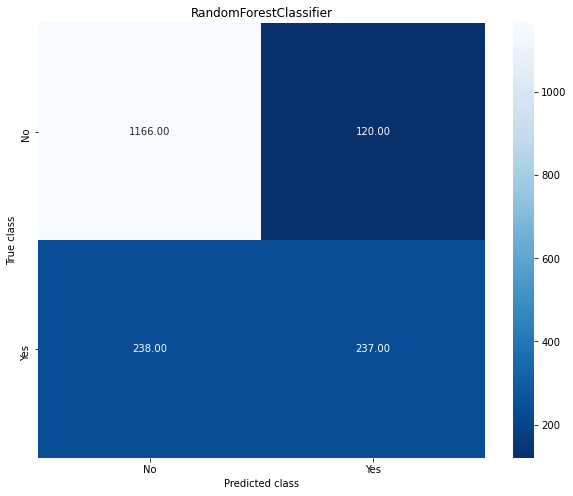

In [59]:
# Finding classification report of RandomForestClassifier
print(classification_report(y_test, y_pred))


plt.figure(figsize=(10,8))
sns.heatmap(cfm, annot=True, fmt='.2f',xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"] ,cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('RandomForestClassifier')

#### After modelling RandomForestClassifier then my next step is to find Roc Score which will help me to make Roc_Auc Curve.¶
#### Below is the Roc Score:

In [60]:
# Random forest  
roc_auc_score(y_test,rfc.predict(x_test))

0.7028173856102152

#### In prediction RandomForestClassifier with Churn:
#### I had done this prediction by taking Churn as an output variable which is Classification in nature.
#### While calculating the best random state the 370 is best state which providing the highest accuracy value for this model.
#### After calculating confusion matrix and classification report of RandomForestClassifier - 78%.
#### Therefore i use hypertuning method by using Grid Search Cv to improve my Accuracy Score and this gives a no increasing value of RandomForestClassifier - 80%¶
#### Then I found roc_auc_score of RandomForestClassifier which is 70.28%.

# AdaBoostClassifier

#### AdaBoost can be used to boost the performance of any machine learning algorithm. It is best used with weak learners. These are models that achieve accuracy just above random chance on a classification problem. The most suited and therefore most common algorithm used with AdaBoost are decision trees with one level.

In [61]:
ada = AdaBoostClassifier()

In [62]:
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)

#### First I have to fit the Training data of AdaBoostClassifier.

In [63]:
#accuracy_score before tuning
print(accuracy_score(y_test,y_pred))

0.7984099943214082


#### According to my perception of modelling AdaBoostClassifier I got Accuracy Score : 79.84%.
#### But this score can improve the accuracy by using Grid Search CV.¶

# Hyperparameter tuning for AdaBoost using GridSearchCV

In [64]:
params = {'n_estimators':[40,42,44,45],'learning_rate':[0.20,0.22,0.234567]}

In [65]:
grd_ada = GridSearchCV(AdaBoostClassifier(),param_grid = params)

In [66]:
grd_ada.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.2, 0.22, 0.234567],
                         'n_estimators': [40, 42, 44, 45]})

In [67]:
grd_ada.best_estimator_

AdaBoostClassifier(learning_rate=0.22, n_estimators=45)

In [68]:
ada = AdaBoostClassifier(learning_rate = 0.2434567,n_estimators = 44)

In [69]:
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)


In [70]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[1181,  105],
       [ 246,  229]], dtype=int64)

In [71]:
ada.score(x_test,y_test)

0.8006814310051107

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1286
           1       0.69      0.48      0.57       475

    accuracy                           0.80      1761
   macro avg       0.76      0.70      0.72      1761
weighted avg       0.79      0.80      0.79      1761



Text(0.5, 1.0, 'AdaBoostClassifier')

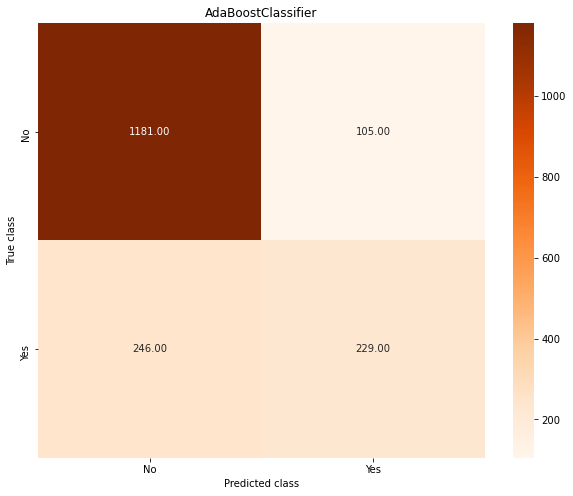

In [73]:
# Finding classification report
print(classification_report(y_test, y_pred))


plt.figure(figsize=(10,8))
sns.heatmap(cfm, annot=True, fmt='.2f',xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"] ,cmap = "Oranges")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('AdaBoostClassifier')

#### After modelling AdaBoostClassifier then my next step is to find Roc Score which will help me to make Roc_Auc Curve.¶
#### Below is the Roc Score:

In [74]:
# AdaBoostClassifier 
roc_auc_score(y_test,ada.predict(x_test))

0.7002283703036752

### In prediction AdaBoostClassifier with Churn:
### I had done this prediction by taking Churn as an output variable which is Classification in nature.
### While calculating the best random state the 3700 is best state which providing the highest accuracy value for this model.
### After calculating confusion matrix and classification report of AdaBoostClassifier - 79.84%.
### Therefore i use hypertuning method by using Grid Search Cv to improve my Accuracy Score and this gives a increasing value of AdaBoostClassifier - 80%
### Then I found roc_auc_score of AdaBoostClassifier which is 70.02%.

# Logistic Regression

#### Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regressionis estimating the parameters of a logistic model (a form of binary regression). Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1". In the logistic model, the log-odds (the logarithm of the odds) for the value labeled "1" is a linear combination of one or more independent variablesthe independent variables can each be a binary variable (two classes, coded by an indicator variable) or a continuous variable.
#### The corresponding probability of the value labeled "1" can vary between 0 (certainly the value "0") and 1 (certainly the value "1"), hence the labeling; the function that converts log-odds to probability is the logistic function, hence the name. The unit of measurement for the log-odds scale is called a logit, from logistic unit, hence the alternative names. Analogous models with a different sigmoid function instead of the logistic function can also be used, such as the probit model; the defining characteristic of the logistic model is that increasing one of the independent variables multiplicatively scales the odds of the given outcome at a constant rate, with each independent variable having its own parameter; for a binary dependent variable this generalizes the odds ratio.

In [75]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

#### First I have to fit the Training data of Logistic Regression.

In [76]:
y_pred = log_reg.predict(x_test)

In [77]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[1150,  136],
       [ 214,  261]], dtype=int64)

In [78]:
log_reg.score(x_test,y_test)

0.8012492901760363

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1286
           1       0.66      0.55      0.60       475

    accuracy                           0.80      1761
   macro avg       0.75      0.72      0.73      1761
weighted avg       0.79      0.80      0.80      1761



Text(0.5, 1.0, 'Logistic Regression')

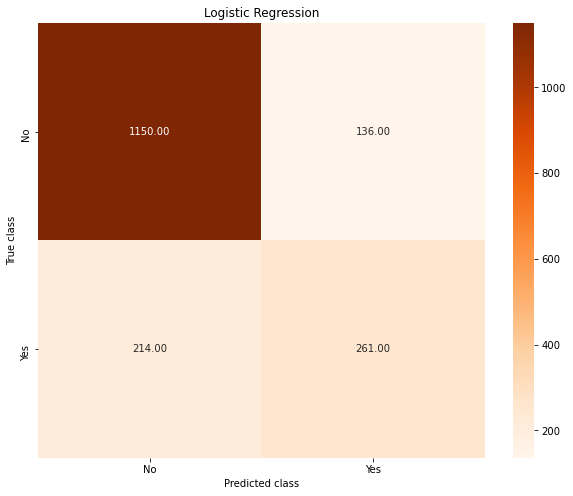

In [79]:
# Finding classification report
print(classification_report(y_test, y_pred))


plt.figure(figsize=(10,8))
sns.heatmap(cfm, annot=True, fmt='.2f',xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"] ,cmap = 'Oranges')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')

#### By using Logistic Regression I Get Accuracy Score : 80%
#### After modelling Logistic Regression then my next step is to find Roc Score which will help me to make Roc_Auc Curve.
#### Below is the Roc Score:

In [80]:
# Logistic Regression
roc_auc_score(y_test,log_reg.predict(x_test))

0.7218597036915773

#### In prediction Logistic Regression with Churn:
#### I had done this prediction by taking Churn as an output variable which is Classification in nature.
#### While calculating the best random state the 0 is best state which providing the highest accuracy value for this model.
#### After calculating confusion matrix and classification report I used Heat Map of Logistic Regression - 80%
#### Then I found roc_auc_score of Logistic Regression which is 72.18%

# Decision Tree Classifier

#### Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.
#### The tree's branches contain the logic for a decision rule, meaning your data is continually split given the input features. The decision tree classifier is commonly used for image classification, decision analysis, strategy analysis, in medicine for diagnosis, in psychology for behavioral thinking analysis, and more.

In [81]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)

##### First I have to fit the Training data of Decision Tree Classifier.

In [82]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[1059,  227],
       [ 244,  231]], dtype=int64)

In [83]:
dtc.score(x_test,y_test)

0.7325383304940375

In [84]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1286
           1       0.50      0.49      0.50       475

    accuracy                           0.73      1761
   macro avg       0.66      0.65      0.66      1761
weighted avg       0.73      0.73      0.73      1761



#### According to my perception of modelling Decision Tree Classifier I got Accuracy Score : 73%.
#### But this score can improve the accuracy by using Grid Search CV.

# Let use Grid search CV for the best parameter to improve the accuracy

In [85]:
grid_param = {'criterion':['gini','entropy'],
             'max_depth':range(2,10,3),
             'min_samples_leaf':range(1,10,2),
             'min_samples_split':range(2,10,2)
             }

In [86]:
grid_search = GridSearchCV(estimator=dtc,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs=1)

In [87]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 3),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [88]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4}


In [89]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth=2,min_samples_leaf=9,min_samples_split=2)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=9)

In [90]:
y_pred = dtc.predict(x_test)

In [91]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[993, 293],
       [139, 336]], dtype=int64)

In [92]:
dtc.score(x_test,y_test)

0.7546848381601363

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1286
           1       0.53      0.71      0.61       475

    accuracy                           0.75      1761
   macro avg       0.71      0.74      0.72      1761
weighted avg       0.78      0.75      0.76      1761



Text(0.5, 1.0, 'DecisionTreeClassifier')

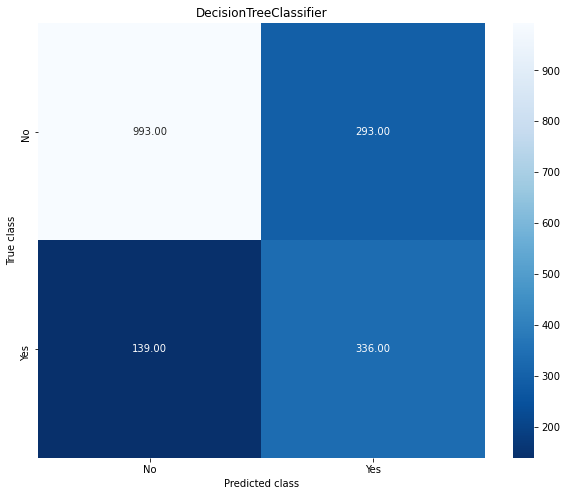

In [93]:
# Finding classification report
print(classification_report(y_test, y_pred))


plt.figure(figsize=(10,8))
sns.heatmap(cfm, annot=True, fmt='.2f',xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"] ,cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('DecisionTreeClassifier')

##### By using Grid Search CV I improve the Accuracy Score : 75%
##### After modelling Decision Tree Classifier then my next step is to find Roc Score which will help me to make Roc_Auc Curve.
##### Below is the Roc Score:

In [94]:
# Decision Tree Classifier AUC score
roc_auc_score(y_test,dtc.predict(x_test))

0.7397650814438896

#### In prediction Decision Tree Classifier with Churn:
#### I had done this prediction by taking Churn as an output variable which is Classification in nature.
#### While calculating the best random state the 3700 is best state which providing the highest accuracy value for this model.
#### After calculating confusion matrix and classification report of Decision Tree Classifier - 73%.
#### Therefore i use hypertuning method by using Grid Search Cv to improve my Accuracy Score and this gives a increasing value of Decision Tree Classifier - 75%
#### Then I found roc_auc_score of Decision Tree Classifie which is 73.97%.

# XGBoost Model

#### XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework.
#### XGBoost is a popular and efficient open-source implementation of the gradient boosted trees algorithm. Gradient boosting is a supervised learning algorithm, which attempts to accurately predict a target variable by combining the estimates of a set of simpler, weaker models.

In [95]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

[18:56:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

##### First I have to fit the Training data of XGBoost Model.

In [96]:
# checking training accuracy

y_pred = xgb.predict(x_train)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_train,predictions)
accuracy

0.919916698220371

In [97]:
# checking initial test accuracy

y_pred = xgb.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test,predictions)
accuracy

0.7717206132879046

In [98]:
x_test

array([[ 0.99053183, -0.43991649,  1.03453023, ...,  0.8297975 ,
         1.33486261,  0.70088972],
       [-1.00955867, -0.43991649, -0.96662231, ..., -1.20511329,
        -1.47405205, -1.50597669],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -1.20511329,
         0.39855772, -1.31985543],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ...,  0.8297975 ,
         0.39855772,  0.65602121],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  0.8297975 ,
         0.39855772, -0.32443902],
       [-1.00955867, -0.43991649,  1.03453023, ...,  0.8297975 ,
         1.33486261, -1.3381352 ]])

In [99]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1286
           1       0.59      0.49      0.53       475

    accuracy                           0.77      1761
   macro avg       0.71      0.68      0.69      1761
weighted avg       0.76      0.77      0.76      1761



#### According to my perception of modelling XGBoost Model I got Accuracy Score : 77%.
#### But this score can improve the accuracy by using Grid Search CV.

# Let use Grid search CV for the best parameter to improve the accuracy

In [100]:
param_grid = {'learning_rate':[1,0.5,0.1,0.01,0.001],
             'max_depth':[3,5,10,20],
             'n_estimators':[10,50,100,200]
             }

In [101]:
grid = GridSearchCV(XGBClassifier(),param_grid,verbose=3)

In [102]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[18:56:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.794 total time=   0.0s
[18:56:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.794 total time=   0.0s
[18:56:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the d

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [103]:
# to find best parameters giving maximum accuracy

grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [104]:
xgb = XGBClassifier(learning_rate='1',max_depth=3,n_estimators=10)
xgb.fit(x_train,y_train)

[18:59:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate='1', max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [105]:
y_pred = xgb.predict(x_test)

In [106]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[1151,  135],
       [ 219,  256]], dtype=int64)

In [107]:

xgb.score(x_test,y_test)

0.7989778534923339

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1286
           1       0.65      0.54      0.59       475

    accuracy                           0.80      1761
   macro avg       0.75      0.72      0.73      1761
weighted avg       0.79      0.80      0.79      1761



Text(0.5, 1.0, 'XGBClassifier')

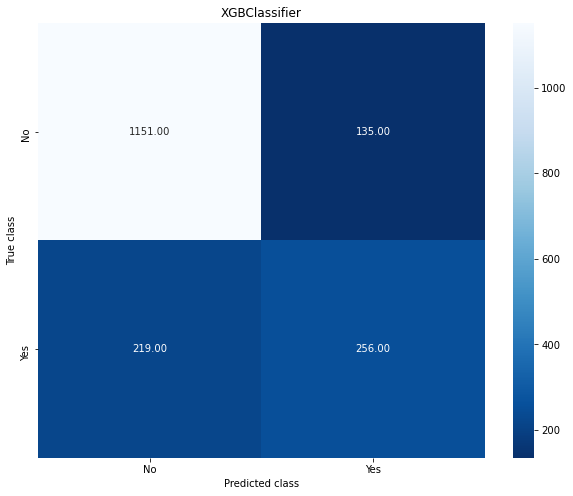

In [109]:
# Finding classification report
print(classification_report(y_test, y_pred))


plt.figure(figsize=(10,8))
sns.heatmap(cfm, annot=True, fmt='.2f',xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"] ,cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('XGBClassifier')

##### By using Grid Search CV I improve the Accuracy Score : 80%
##### After modelling XGBClassifier then my next step is to find Roc Score which will help me to make Roc_Auc Curve.¶¶
##### Below is the Roc Score:

In [110]:
# XGBClassifier 
roc_auc_score(y_test,xgb.predict(x_test))

0.7169853482851765

#### In prediction XGBClassifier with Churn:
###### I had done this prediction by taking Churn as an output variable which is Classification in nature.
###### While calculating the best random state the 370 is best state which providing the highest accuracy value for this model.
###### After calculating confusion matrix and classification report of XGBClassifier - 77%.
###### Therefore i use hypertuning method by using Grid Search Cv to improve my Accuracy Score and this gives a decreasing value of XGBClassifier - 80%¶¶
###### Then I found roc_auc_score of XGBClassifier which is 71.69%.

# Roc Curve

#### In Machine Learning, performance measurement is an essential task.
#### So when it comes to a classification problem, I can count on an AUC - ROC Curve.
#### When I need to check or visualize the performance of the multi-class classification problem, I use the AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve.
#### It is one of the most important evaluation metrics for checking any classification model’s performance. It is also written as AUROC (Area Under the Receiver Operating Characteristics).

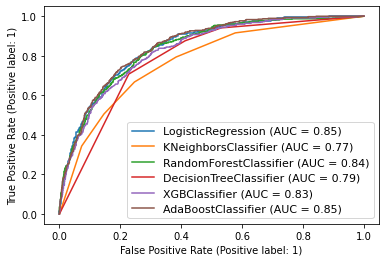

In [111]:
disp = plot_roc_curve(log_reg,x_test,y_test)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dtc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ada,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

##### The area under the ROC curve represents the ability of our model to predict correct values, and the curve that we got is quite a good score.

# Saving the Best Model

In [115]:
import pickle

In [116]:
# saving the Logistic Regression Model

filename = 'finalized_model.pickle'
pickle.dump(log_reg,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))

#### From the Above Coding I Get best model of Logistic Regression Model Accuracy Score.¶
#### So I use Logistic Regression Model to Save the Best Model.

# Conclusion

#### I’ll briefly discuss how I approached this problem of predicting Churn prediction.
#### a) I have Census Income Prdiction datastet from which I had to extract information.
#### b ) I had used pandas library to read the Dataset which provide me to explore & viualize the Data properly based on Rows & Columns.
#### c) After from all datasets, I preprocessed the data using imputer function to fill the missing values and replacing all zeros.
#### d) I did exploratory data analysis on main data frame and tried to remove all the possible outliers.
#### e) Based on visulization knowledge, I use various EDA TECHNIQUES to plot the graphs and Z - SCORE.
#### f) I use VIF and Standard Scalar to scaled the data and by VIF I make a relationship between Features & Features.
#### g) After from all these i split the Features & Labels into 2 parts.
#### h) On this data, I have applied our machine learning models such as logistic regression, Random forest,Decision Tree,ADABoost Classifier, XGBoost Classifier and KNN.
#### In the modeling Building section, we have seen the hyperparameter tuned logistic regression has the highest Best Score (0.80).
#### It can be clearly seen the feature engineering effects on each individual nine model in 'Comparison of ML Classifiers with Effects of Future Engineering' Roc Curve chart above.